# Import

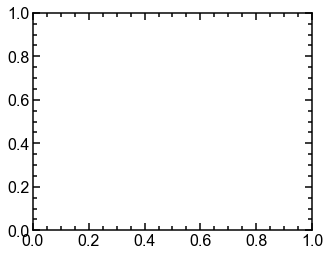

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.serif'] = ['Arial']
from scipy.special import*
import scipy.linalg
from qutip.qip.operations import*
from scipy.optimize import minimize


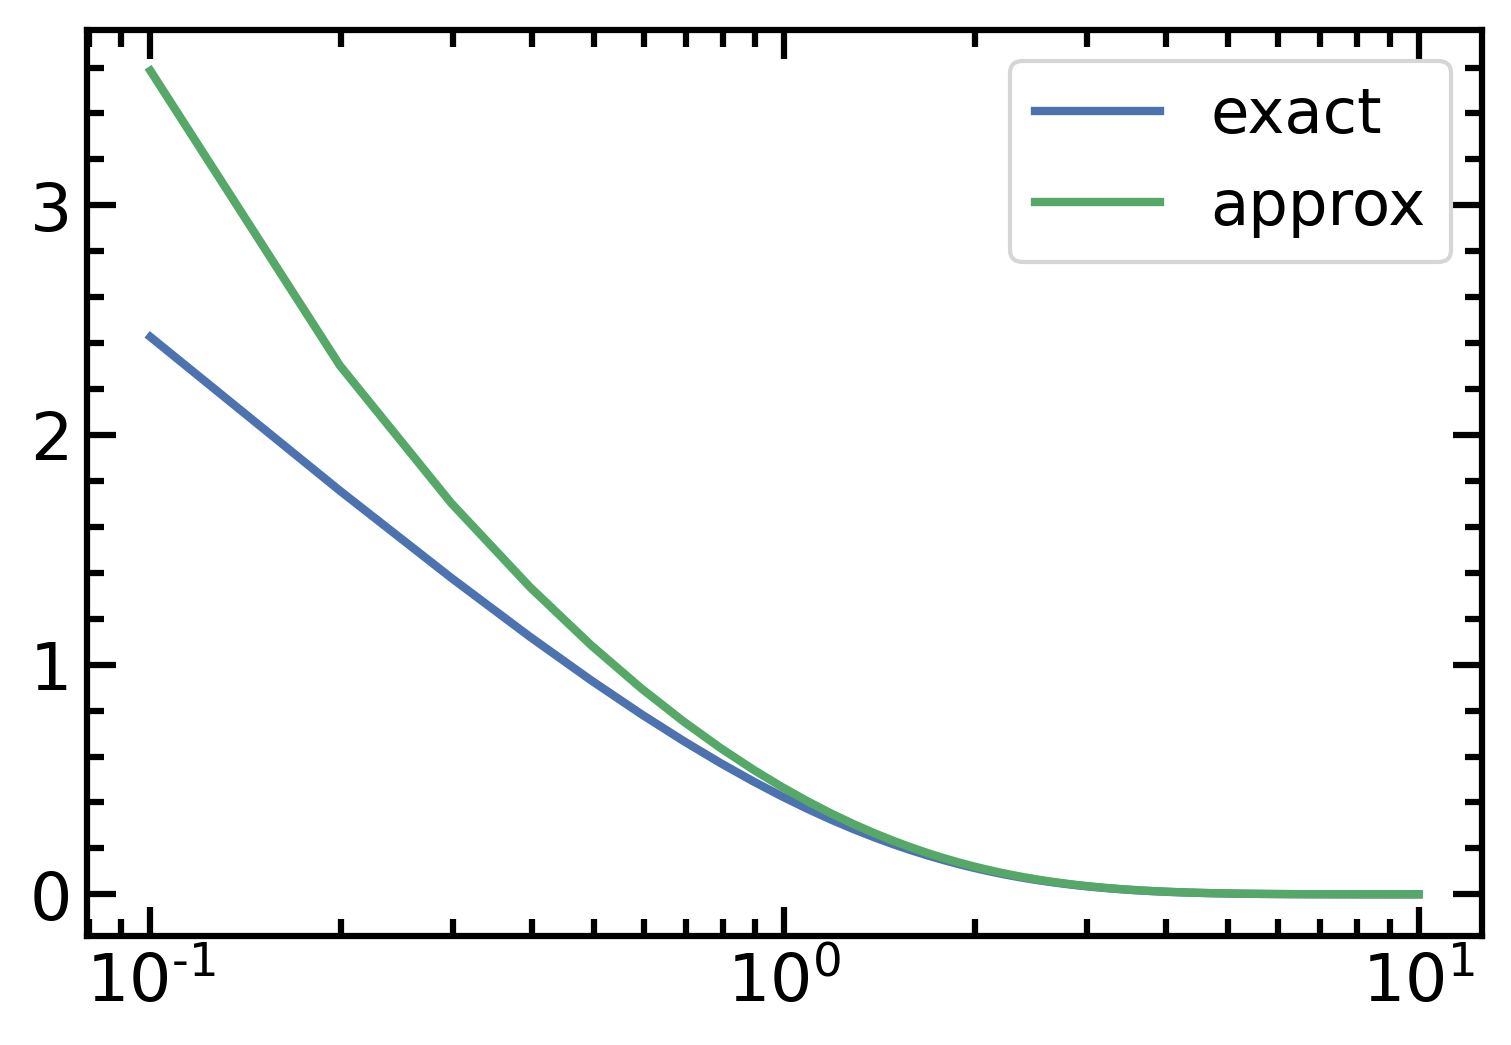

In [2]:
x = np.linspace(0.1, 10, 101)
# print (x)
y = kn(0,x)
y1 = np.exp(-x)*np.sqrt(np.pi/x/2)
plt.plot(x,y, label ='exact')
plt.plot(x,y1, label = 'approx')
plt.legend()
plt.xscale('log')

In [3]:
from scipy import constants
h = constants.h
k = constants.k
(h*0.2e9)/(k*20e-3)

0.4799243073366221

In [4]:
psi_0 = basis(2,0)
psi1 = rx(np.pi/2)*psi_0
psi = rx(np.pi/2)* psi1
print (psi1)
print(psi)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.j]
 [0.-1.j]]


## I JUST WANT TO DRAW A PULSE HERE

(-110.0, 110.0, -1.059530064845351, 1.098072860230731)

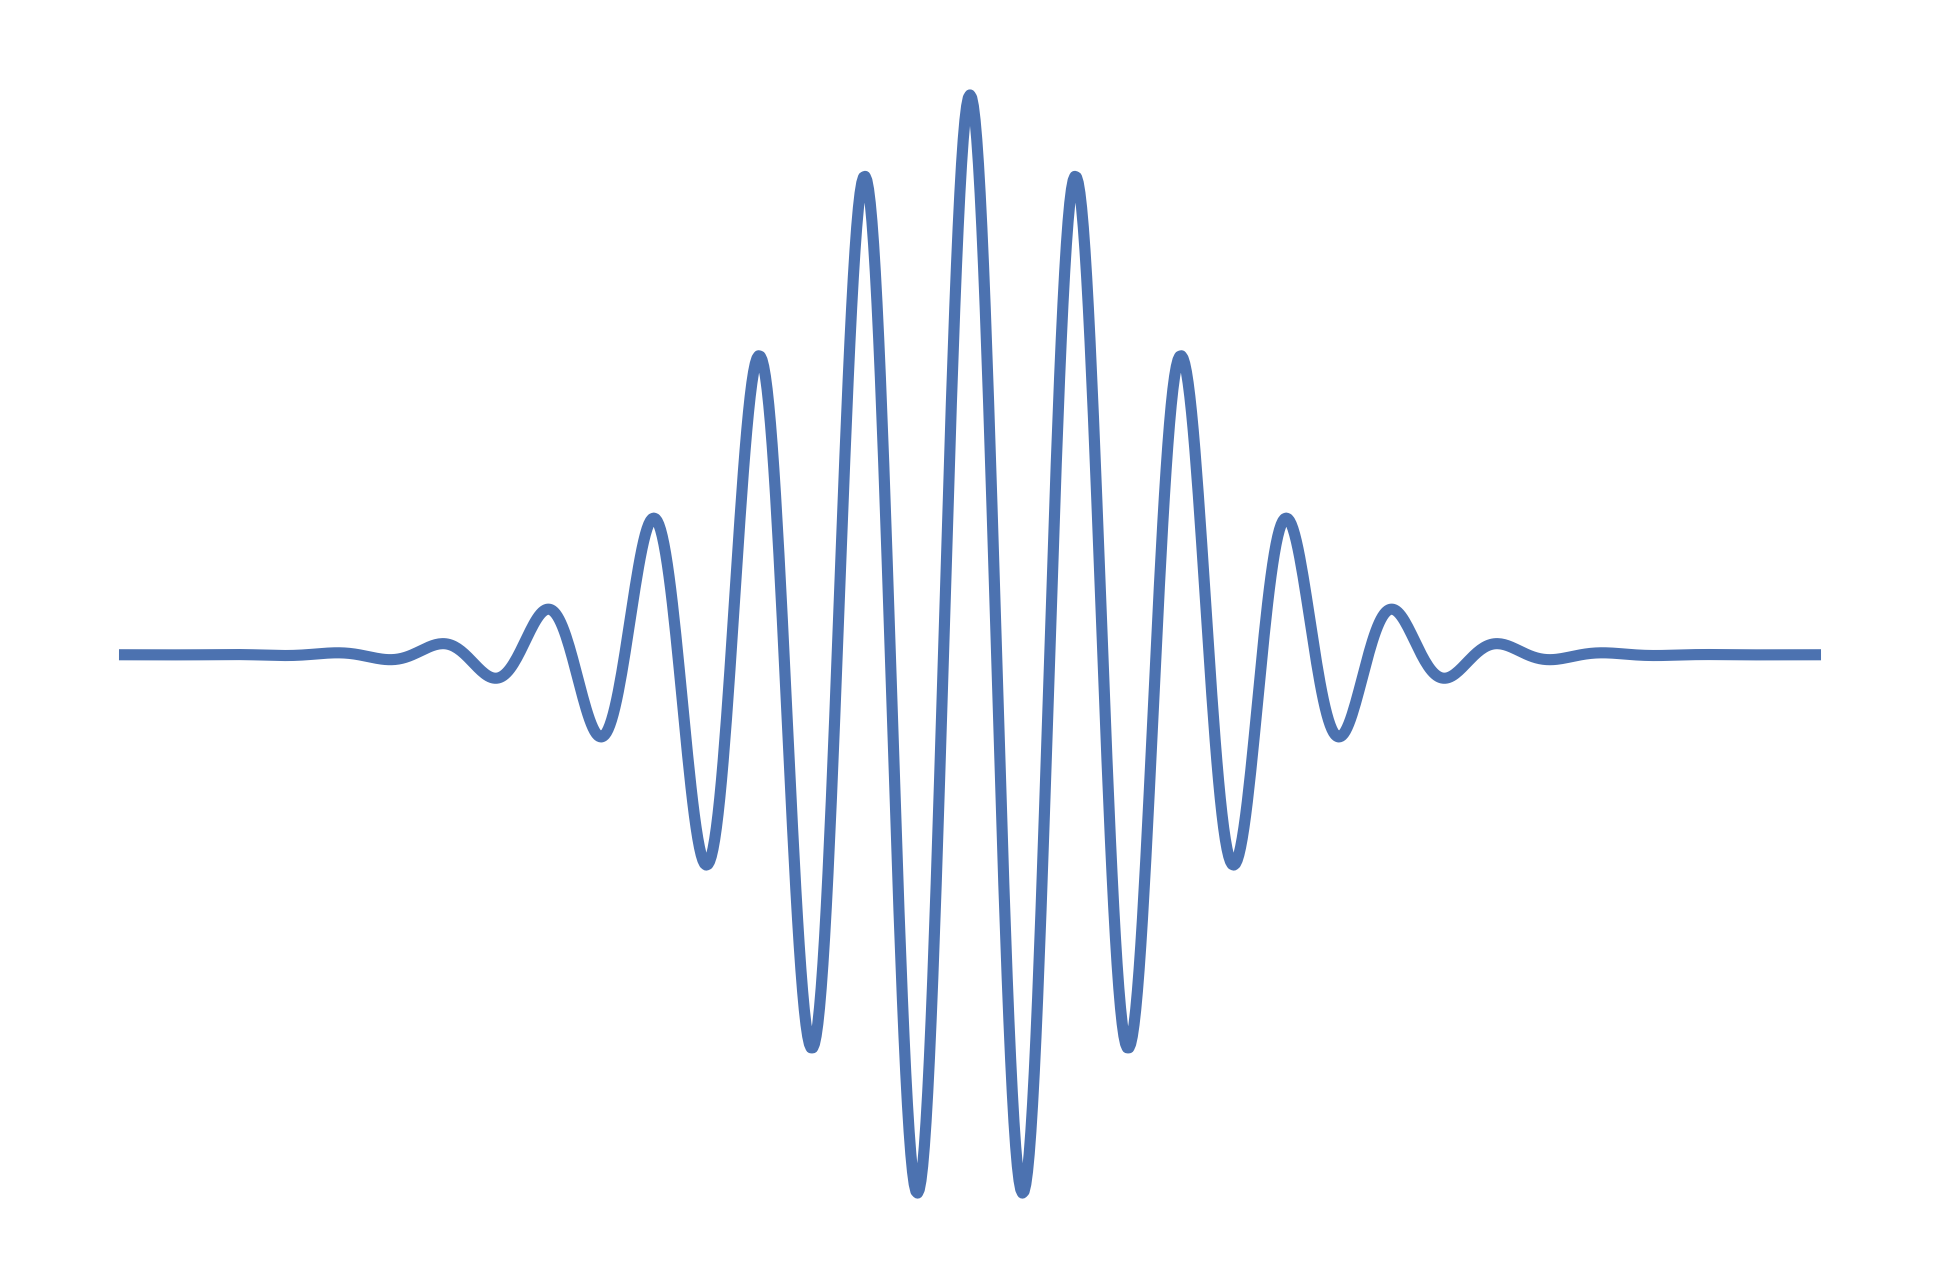

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
x = np.linspace(-100,100,1001)
y = np.exp(-x**2/1000)*np.cos(x/2)
plt.plot(x,y)
plt.axis('off')

# figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/SCQ summary/'
# plt.savefig(figpath + 'pulse.eps')

(3.8, 96.2, -1.0938153340021932, 0.9701220140460568)

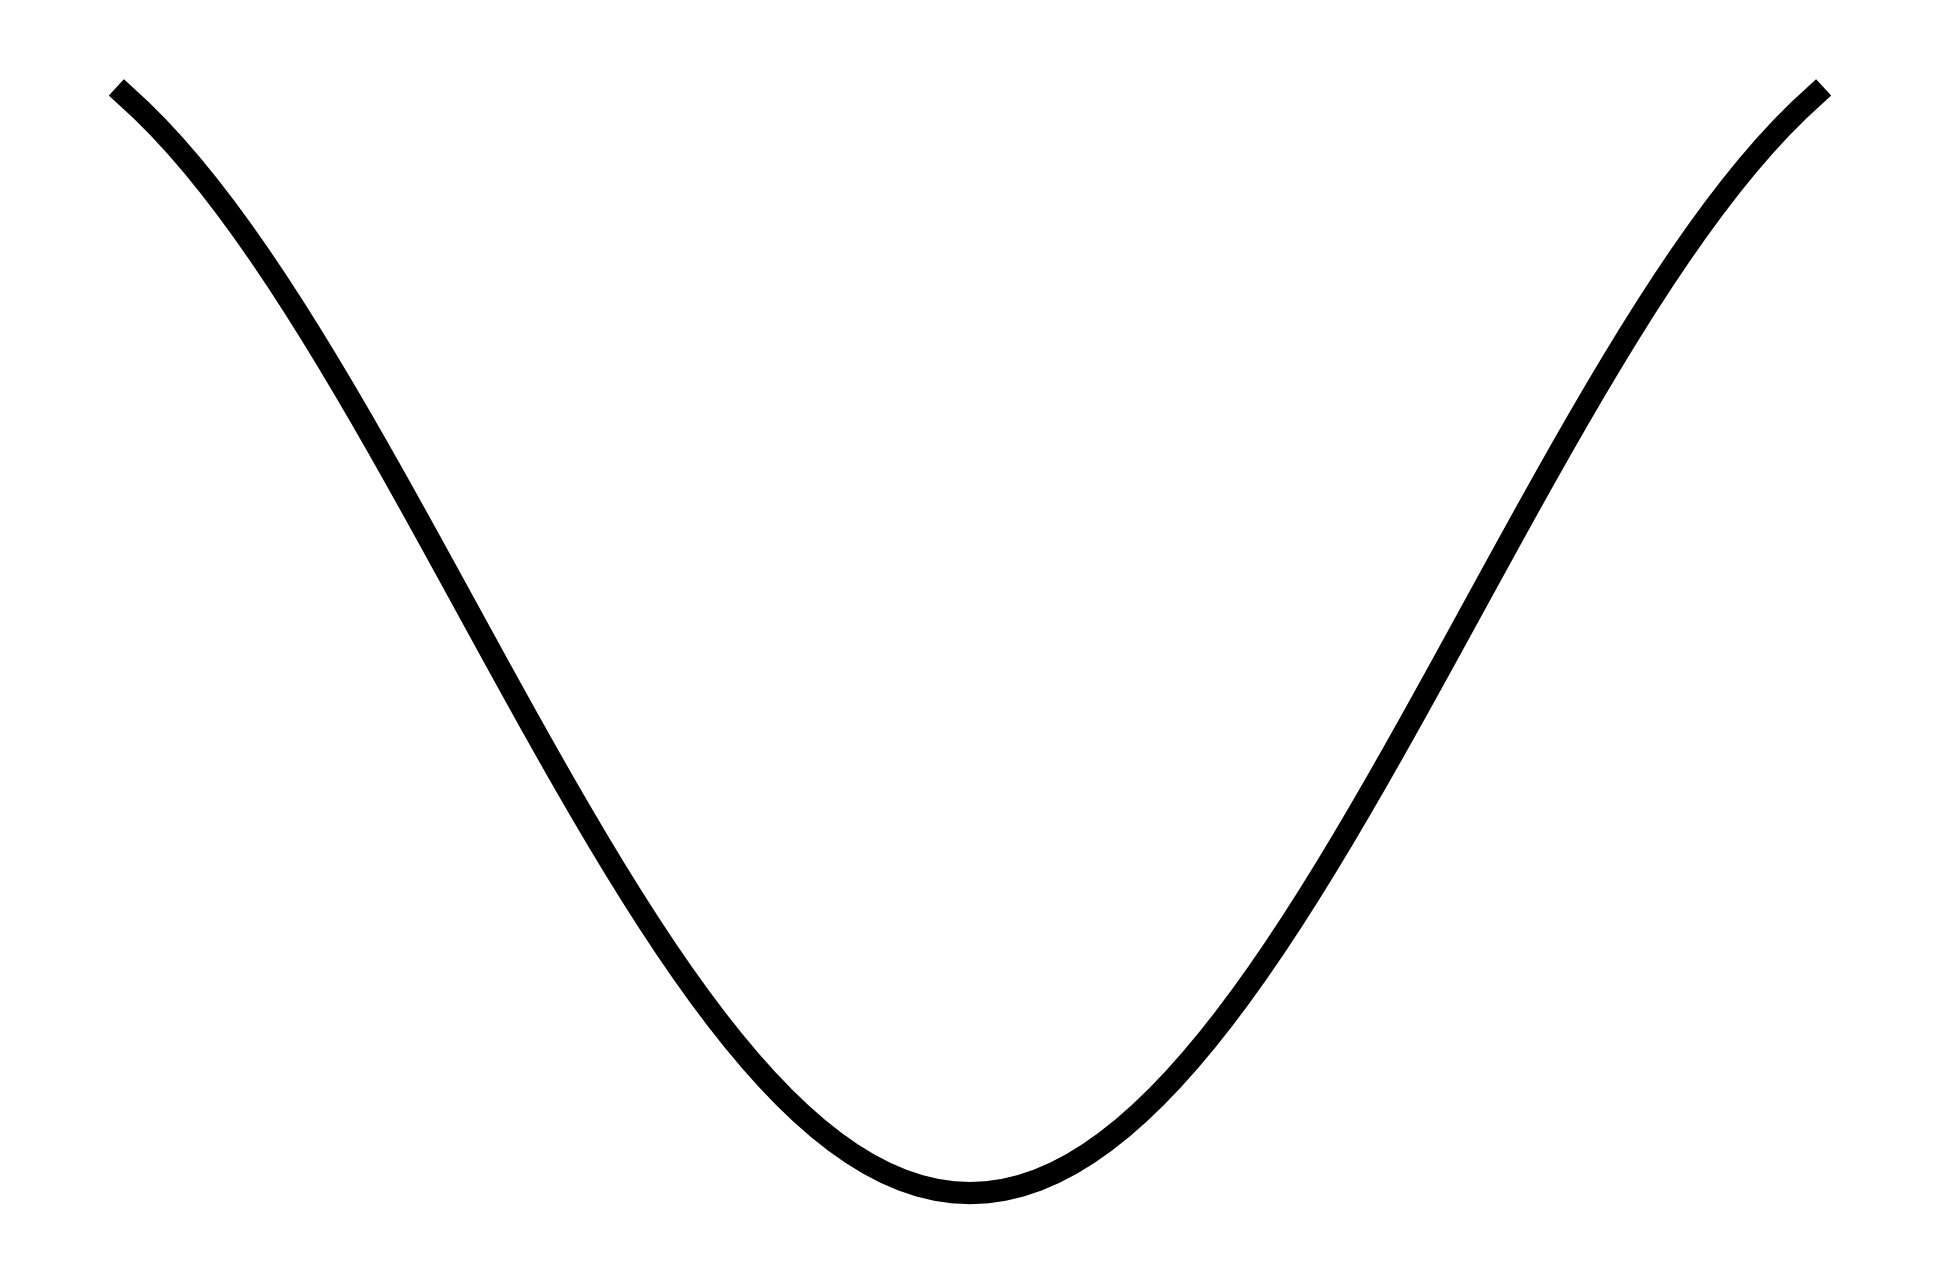

In [6]:
x = np.linspace(8,92,101)
freq = 1/100
y = np.cos(2*np.pi*freq*x)
plt.plot(x,y,'k',linewidth = 4.0)
plt.axis("off")
# plt.savefig('/Users/longnguyen/Desktop/cosine.pdf')

# Three-qubit gates

In [367]:
psi_ini = tensor(basis(2,0),basis(2,1),basis(2,0))

gate_itoffoli = np.array([[0, 0, 1j, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[1j, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1]])

gate_itoffoli = np.array([[0, 0, 1, 0, 0, 0, 0, 0],
            [0, 1j, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1j, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 1]])

gate_itoffoli = Qobj(gate_itoffoli)
gate_itoffoli.dims = [[2, 2, 2], [2, 2, 2]]
psi_out = gate_itoffoli*psi_ini
print (psi_ini)
print (psi_out)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [7]:
gate_CCZ = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])
gate_CCZ = Qobj(gate_CCZ)
gate_CCZ.dims = [[2,2,2],[2,2,2]]

In [11]:
gate = tensor(qeye(2), cphase(np.pi)) * gate_CCZ
gate

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]

In [352]:
toffoli()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

## Qutrit unitaries combination

In [32]:
#qutrit label 00 01 10 11 02 20 12 21 22
gate1 = np.array([
    [1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1j,0,0,0,0],
    [0,0,0,1j,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,1],
])
gate1 = Qobj(gate1)
gate1.dims = [[3,3],[3,3]]
gate2 = np.array([
    [1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,0,-1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,1],
])
gate2 = Qobj(gate2)
gate2.dims = [[3,3],[3,3]]

gate = tensor(qeye(3),gate1) * tensor(gate2,qeye(3)) * tensor(qeye(3),gate1)

# #projection
basis_list= [basis(3,0),basis(3,1)]
state_list = []
for state1 in basis_list:
    for state2 in basis_list:
        for state3 in basis_list:
            state = tensor(state2,state3,state1)
            state_list = np.append(state_list,np.array(state))
P = 0
for state in state_list:
    state = Qobj(state)
    state.dims = [[3,3,3],[1,1,1]]
    P += state*state.dag()
gate
P

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[8.]]

# State tomography

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.40909091+0.j         0.27272727-0.40909091j]
 [0.27272727+0.40909091j 0.59090909+0.j        ]]


<Figure size 2800x2800 with 0 Axes>

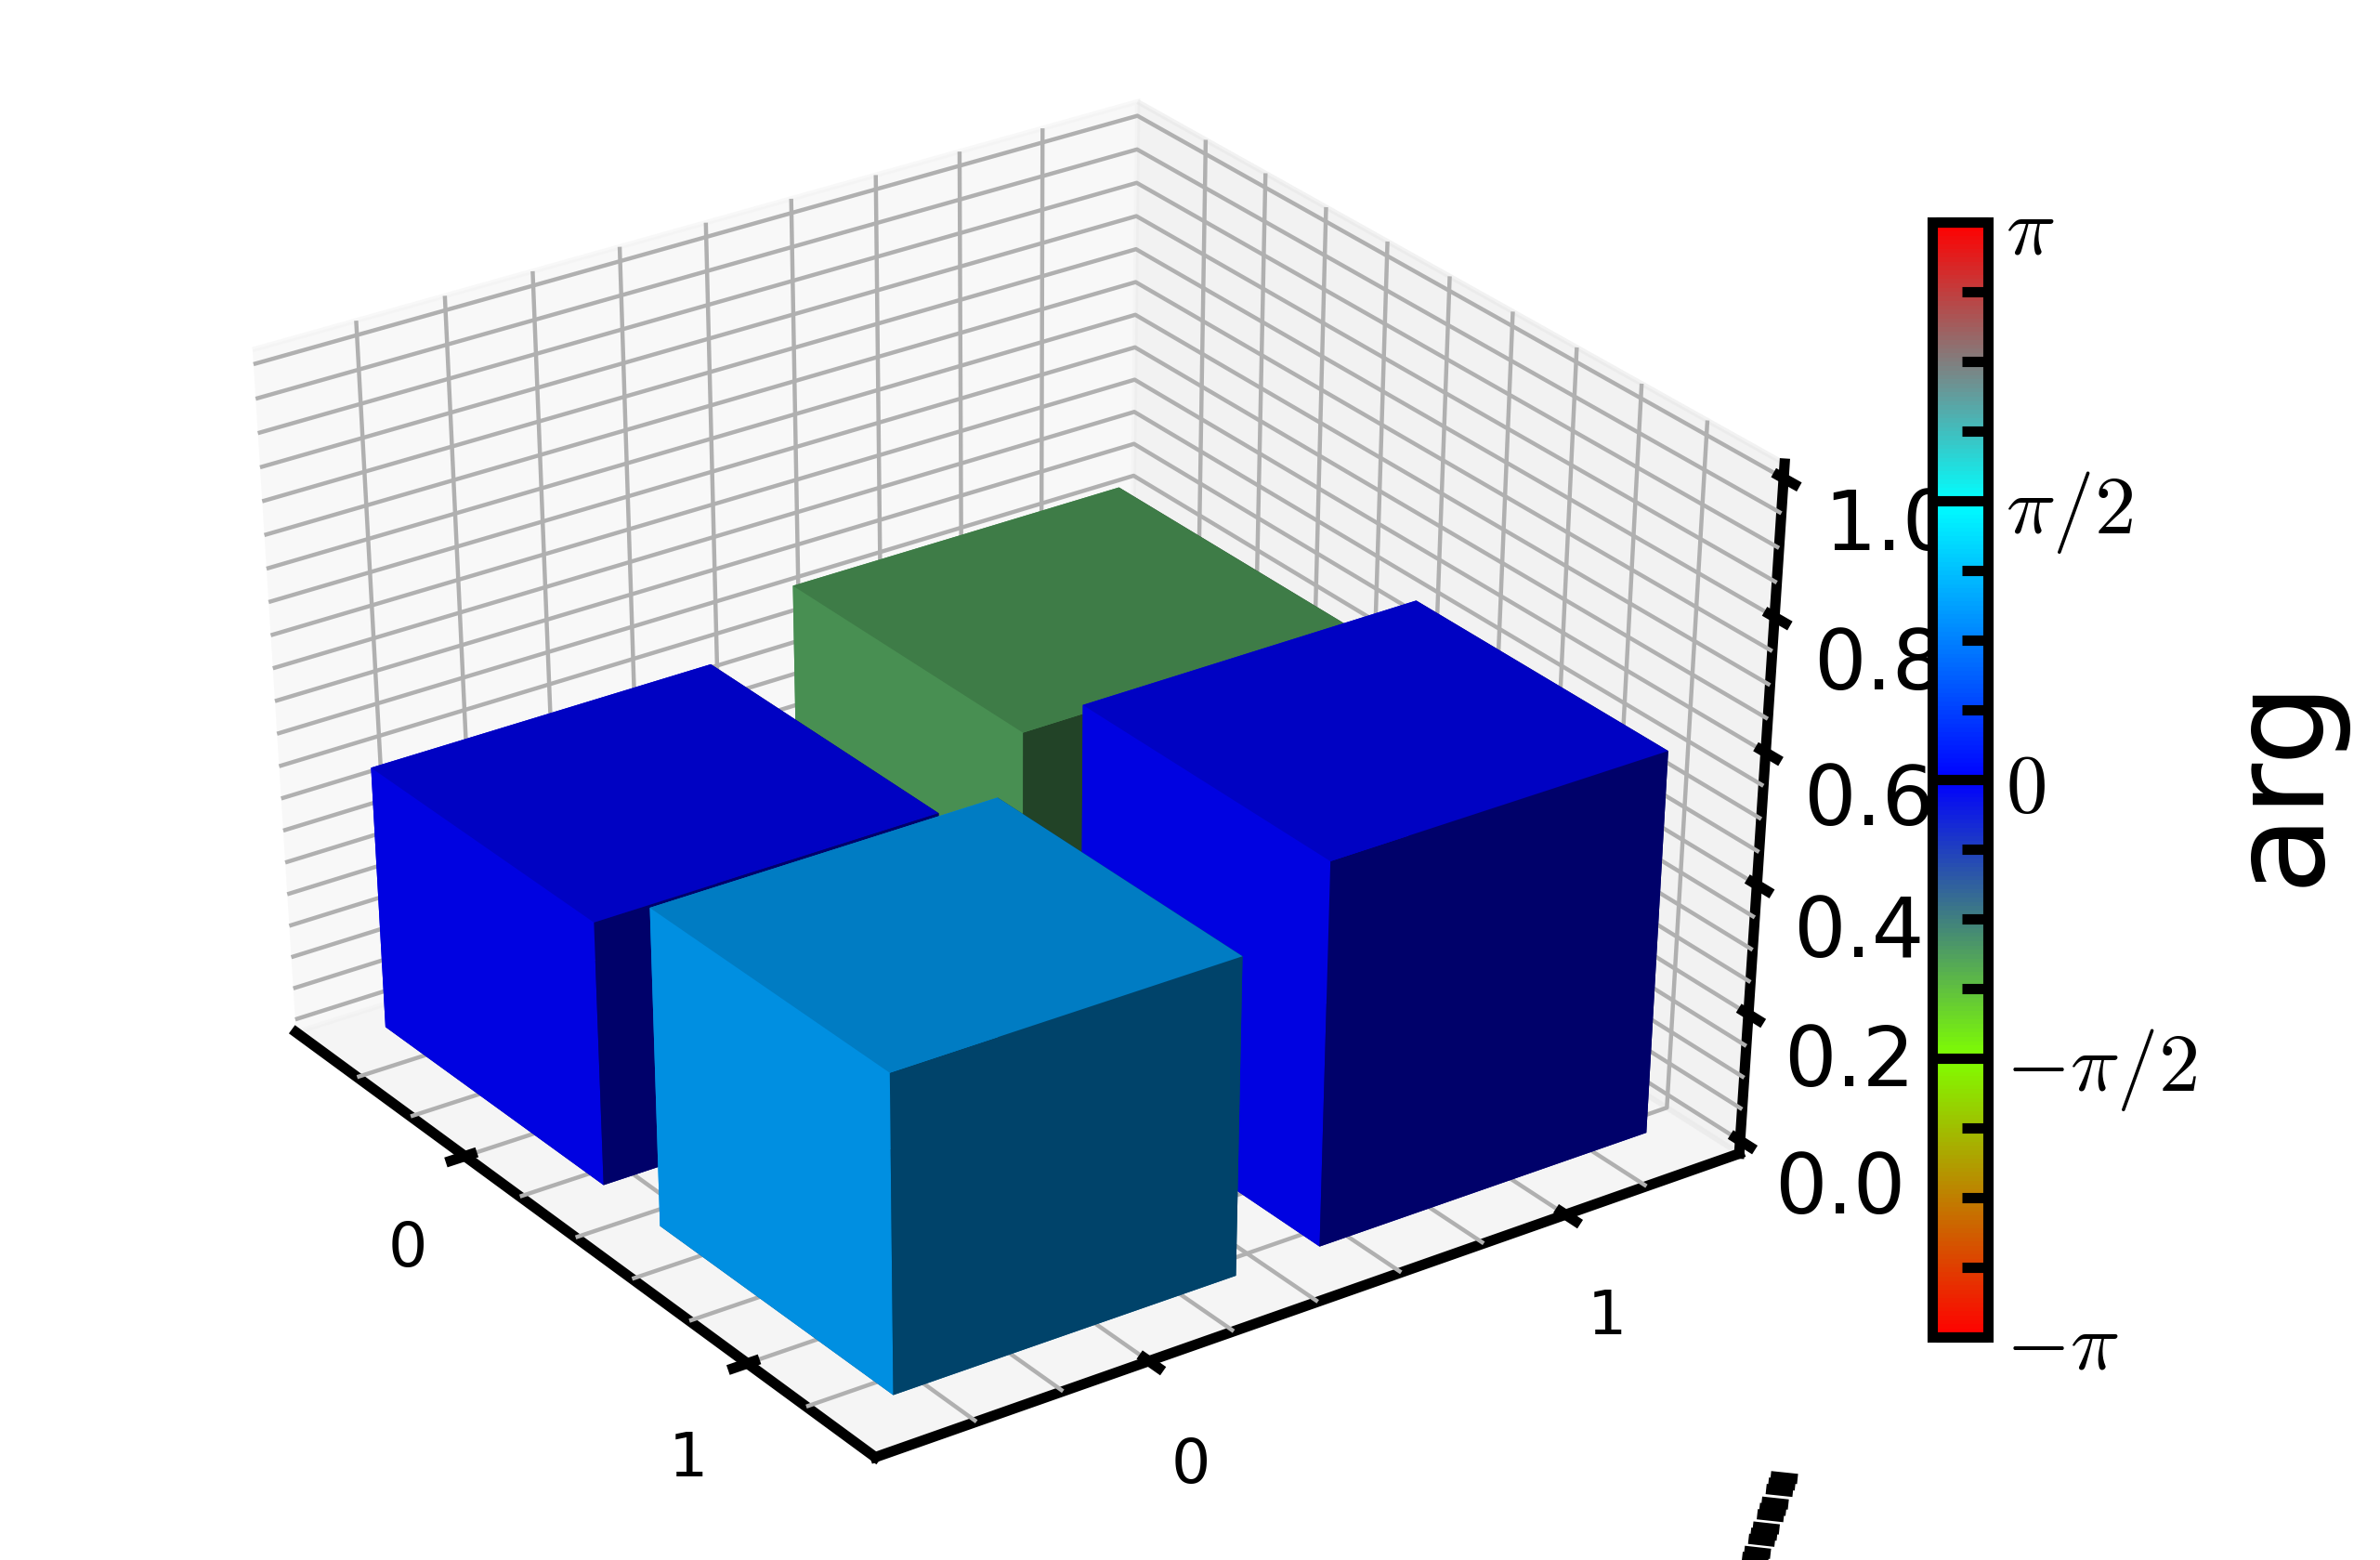

In [3]:
#State tomography
plt.figure(figsize=[7,7])
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
rho = ket2dm(psi)
matrix_histogram_complex(rho)
print (rho)

(<Figure size 2400x1600 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f9a86f6deb0>)

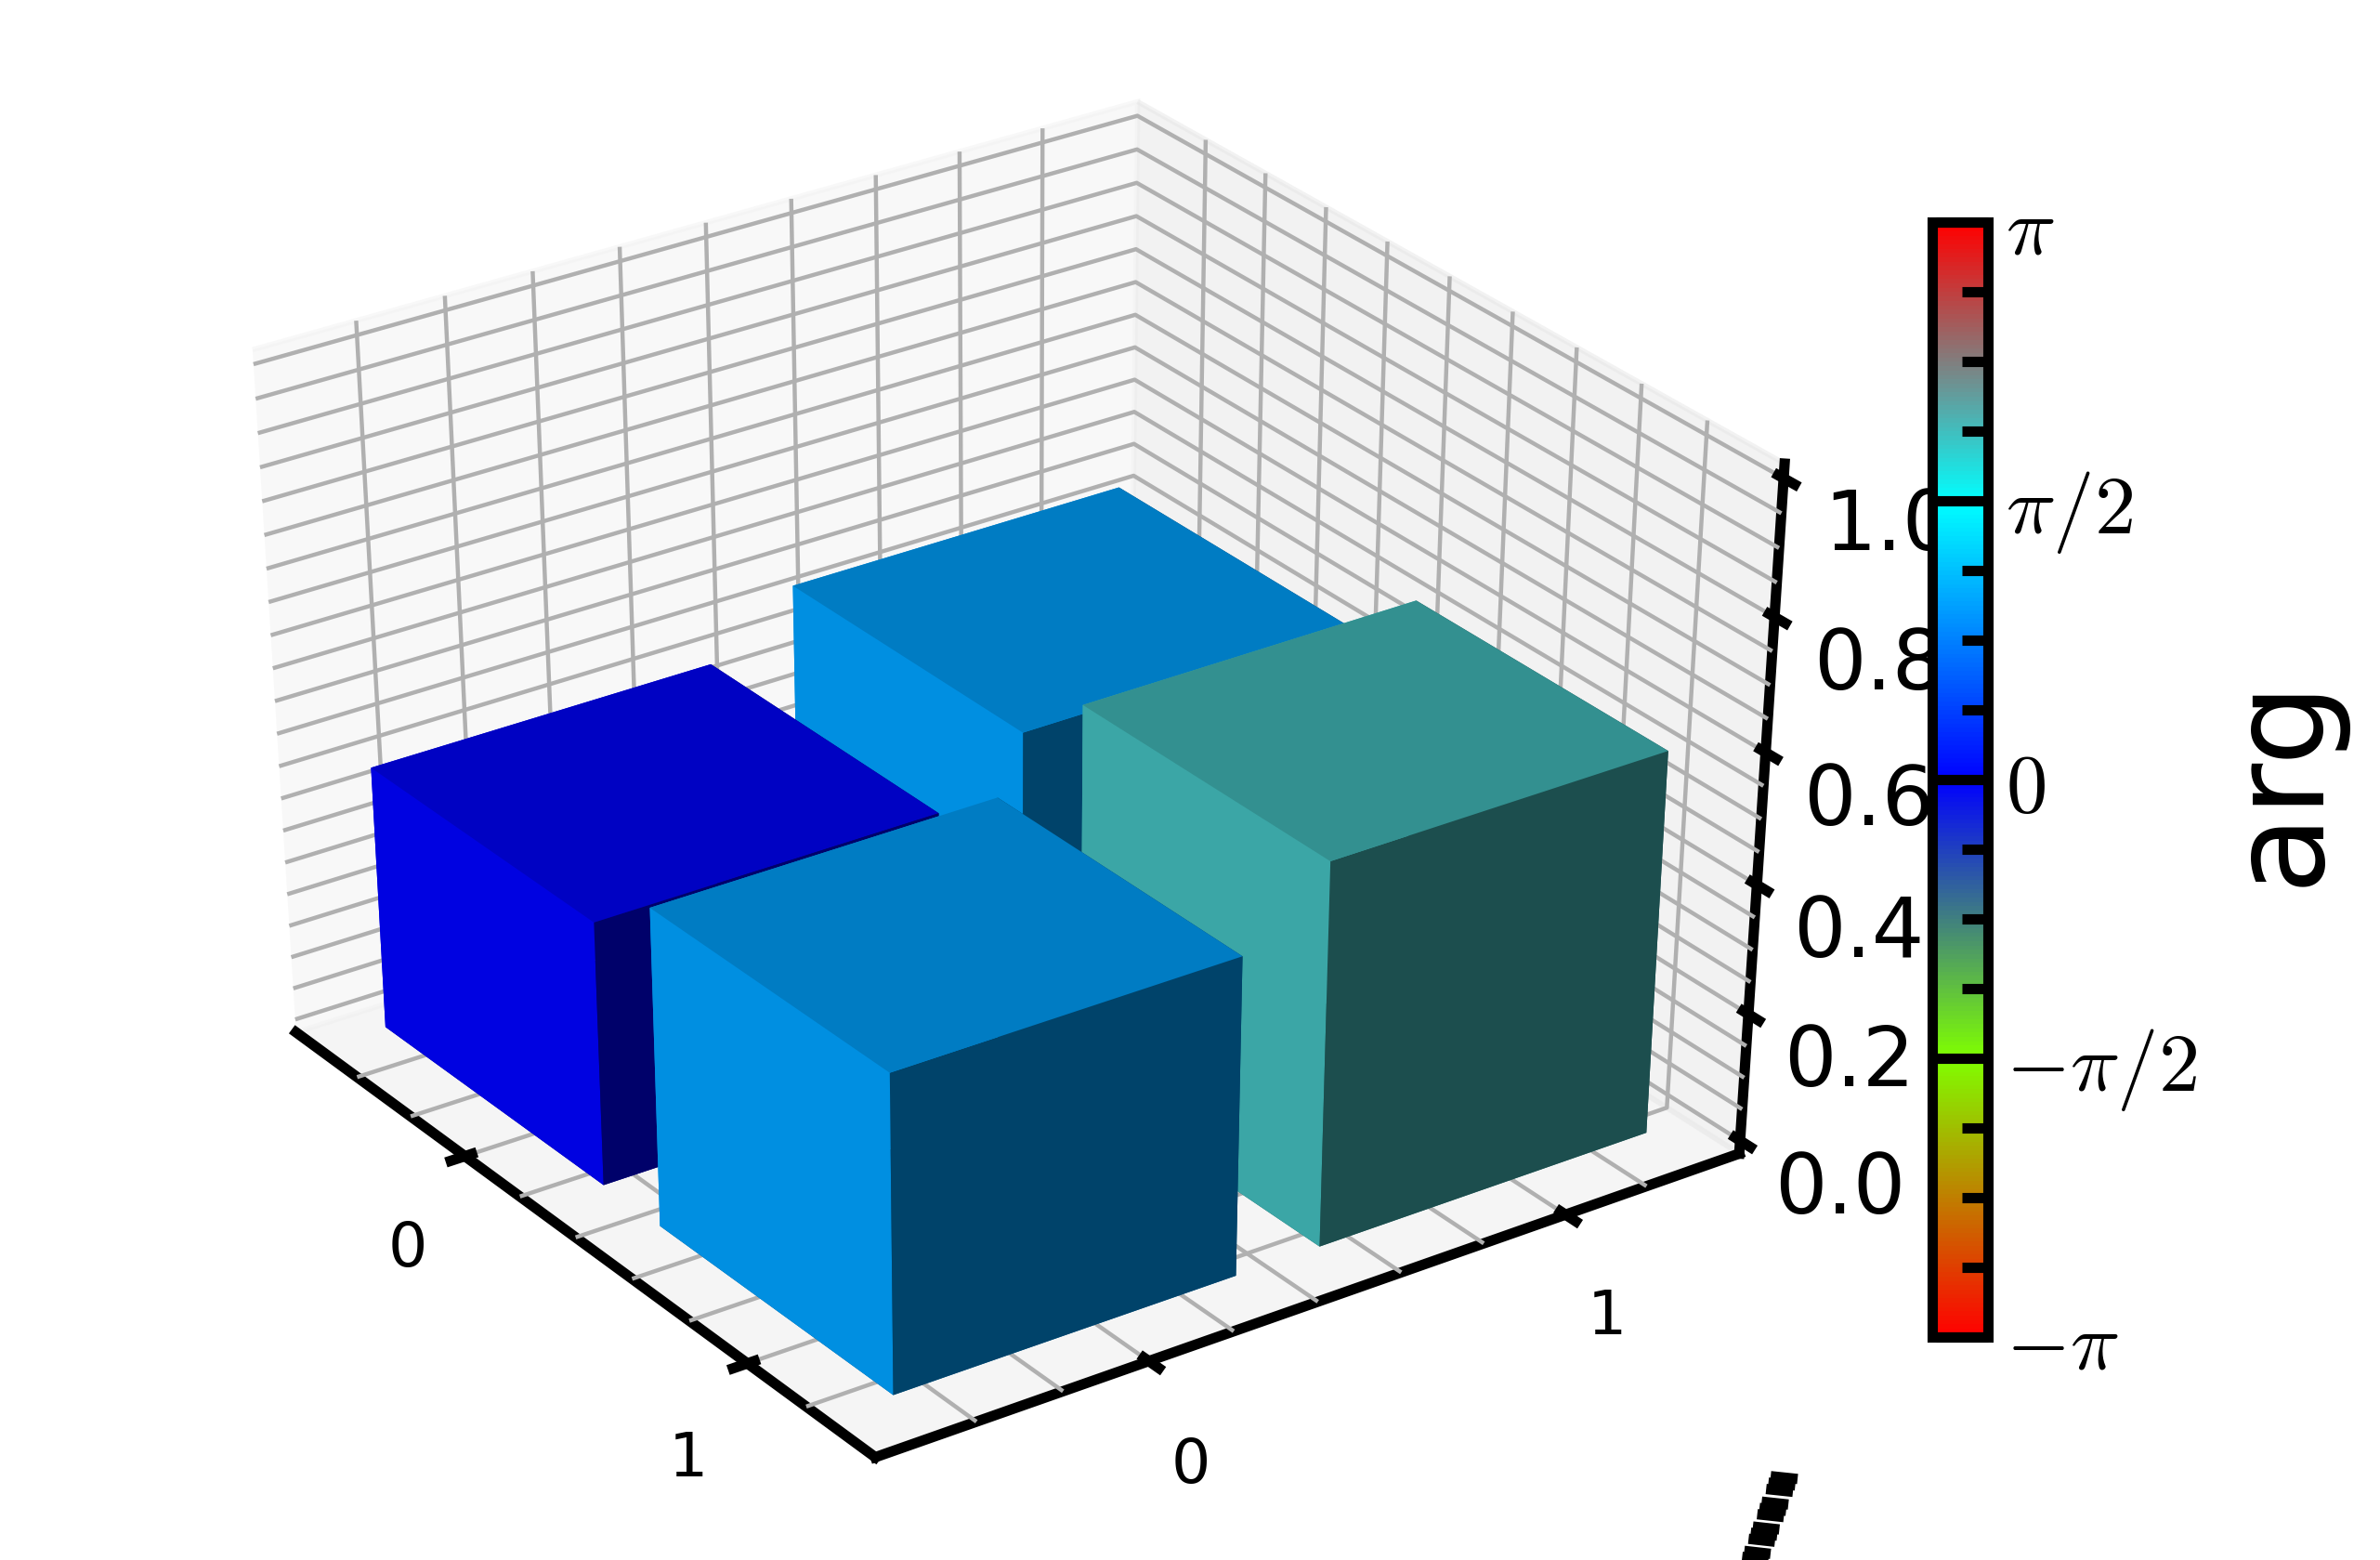

In [4]:
#Can also define matrices
psi0 = np.matrix([1,0]).transpose()
psi1 = np.matrix([0,1]).transpose()
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
# psi = Qobj(psi)
# rho = ket2dm(psi)
#or
rho = psi*psi.transpose()
rho = Qobj(rho)
matrix_histogram_complex(rho)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0.5+0.j  0. +0.5j 0. +0.j ]
 [0. +0.j  0. -0.5j 0.5+0.j  0. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  0. +0.j ]]

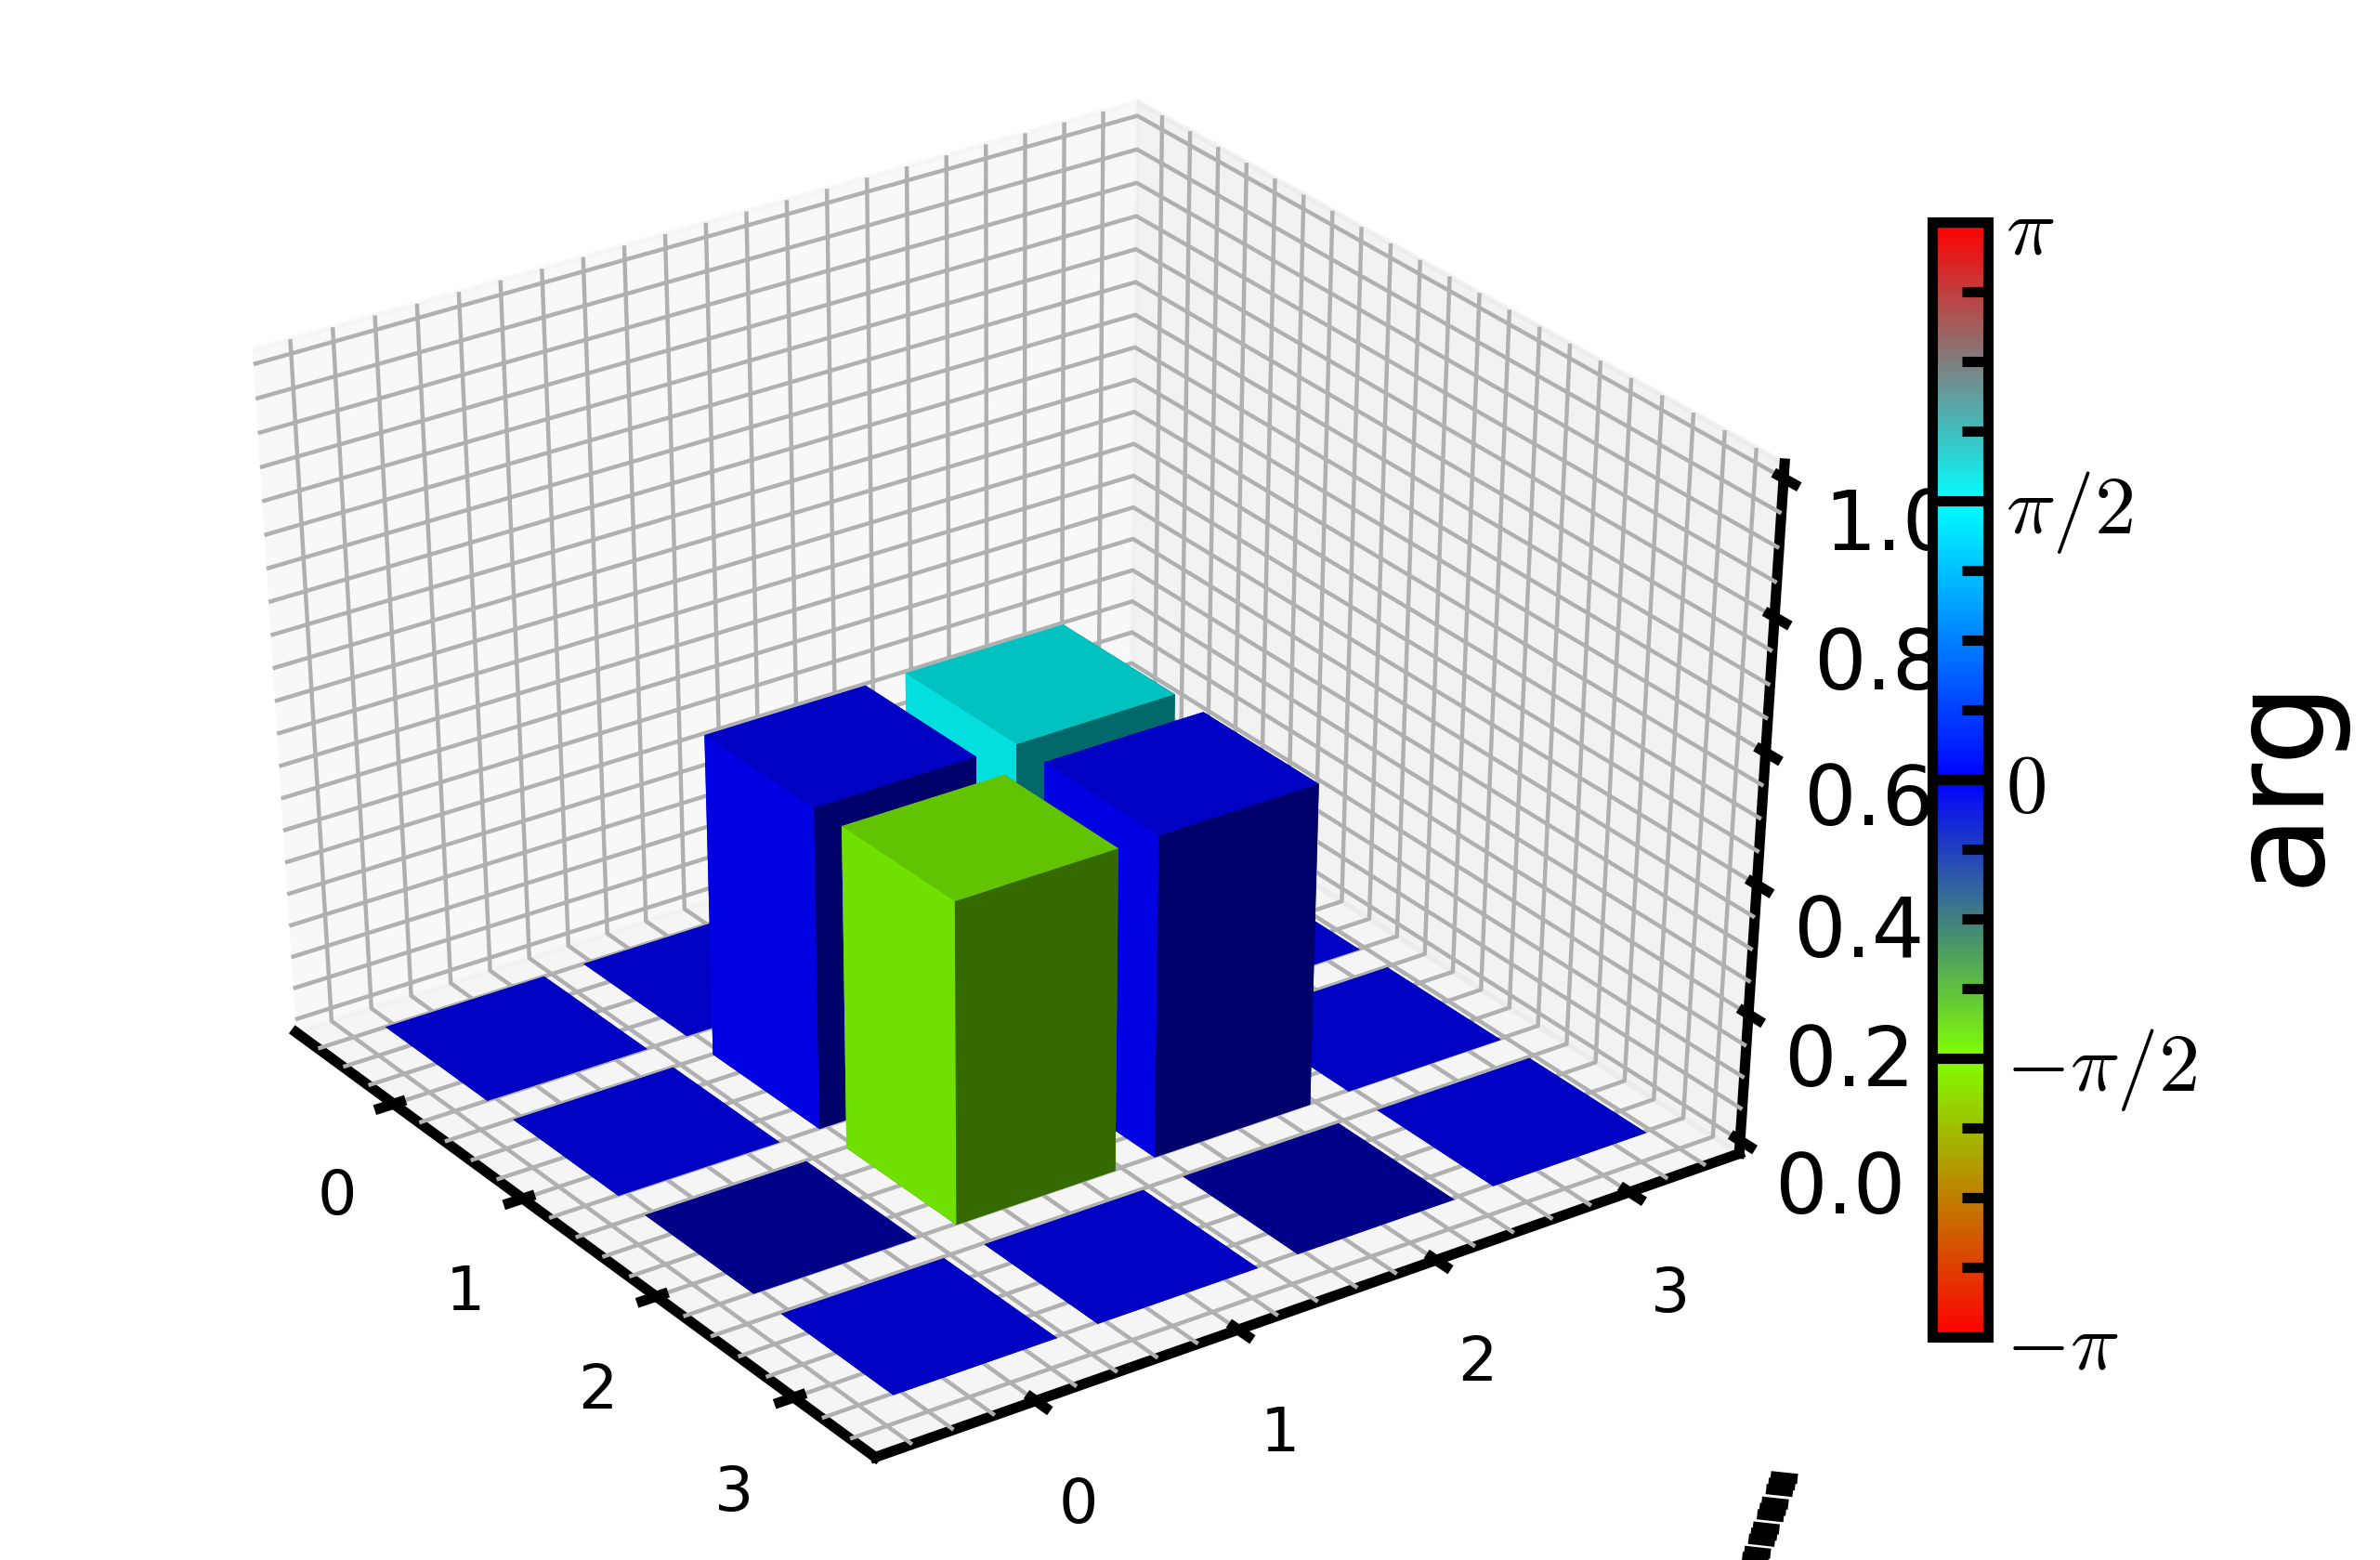

In [5]:
psi0 = basis(2,0)
psi1 = basis(2,1)
psi_sup = (psi0 - 1j*psi1)/np.sqrt(2)
# psi_ini = tensor(basis(2,1),basis(2,0))
psi_ini = tensor(psi1, psi0)
psi_out = sqrtiswap()*tensor(rz(-2.88), rz(-0.5))*psi_ini
matrix_histogram_complex(ket2dm(psi_out))
ket2dm(psi_out)

In [6]:
uni = np.array(sqrtiswap())
uni

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.j        ,
        0.        +0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.70710678j,
        0.70710678+0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 1.        +0.j        ]])

## Quantum fidelity

See http://qutip.org/docs/4.0.2/modules/qutip/metrics.html

Definition: 

a. State fidelity
$$ \mathcal{F}(\rho,\sigma)=\left(\mathrm{Tr}\sqrt{\rho^{1/2}\sigma\rho^{1/2}} \right)^2$$
from which the fidelity between a pure state $|\psi \rangle$ and an arbitrary state $\rho$ can be written as
$$\mathcal{F}(\rho,\psi)=\sqrt{\langle\psi |\rho |\psi\rangle}$$

b. Process fidelity

If the $\chi$ matrix is known, then the fidelity to the ideal state $\chi'$ is 
$$ \mathcal{F}(\chi,\chi')=\left(\mathrm{Tr}\sqrt{\chi^{1/2}\chi '\chi^{1/2}} \right)^2$$

From Pedersen et al., the fidelity between two unitary operations $U$ and $U_o$ is
$$\mathcal{F}=\frac{1}{N(N+1)}\left[\mathrm{Tr}(MM^\dagger) + |\mathrm{Tr}(M)|^2 \right],$$
with $M=U_0^\dagger U$ and $N=2^n$ is the dimension of the Hilbert space

In [7]:
#Using qutip's built in fidelity functions
from qutip import fidelity
psi0 = basis(2,0)
psi1 = basis(2,1)
a=1
b=1
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
print("state fidelity between 0 and 1: ", fidelity(psi0,psi1))
print("state fidelity between 1 and 1:", fidelity(psi1,psi1))
print("state fidelity between 1 and superposition:", fidelity(psi1,psi))

from qutip.qip.operations import cnot
from qutip.qip.operations import csign
from qutip import process_fidelity
cz = csign()
iden = identity(4)
print("process fidelity between cz and cnot: ", process_fidelity(cz,cnot()))
print("process fidelity between cz and cz: ", process_fidelity(cz,cz))
# print("process fidelity between cz and I: ", process_fidelity(cz,iden))

#Or define it ourselves
rho0 = np.array([[1,0],[0,0]])
rho1 = np.array([[0,0],[0,1]])
rho = np.array([[1,1],[1,1]])/np.sqrt(2)


def state_fidelity_func(rho,rho_ideal):
    f = abs(np.trace(scipy.linalg.sqrtm(scipy.linalg.sqrtm(rho_ideal).dot(rho).dot(scipy.linalg.sqrtm(rho_ideal)))))
    return f**2

def process_fidelity_func(U,U_ideal,qubit_num):
    N = 2**qubit_num
    coeff = (N*(N+1))**-1.0
    M = np.conj(U_ideal.transpose()) * U
    f = np.trace(M*np.conj(M.transpose())) + np.trace(M)**2
    return coeff * f

print ('State fidelity as defined, 0 and 1: ', state_fidelity_func(rho0,rho1))    
print ('State fidelity as defined, 0 and 0: ',state_fidelity_func(rho0,rho0))    
print ('State fidelity as defined, 0 and superposition: ', state_fidelity_func(rho0,rho))    
U_cz = np.diag([1,1,1,-1])
U_cnot = np.diag([1,1,0,0])
U_cnot[2,3] = 1
U_cnot[3,2] = 1
U_iden = np.diag([1,1,1,1])
print("Defined process fidelity between cz and cnot: ", process_fidelity_func(U_cz,U_cnot, 2))
print("Defined process fidelity between cz and cz: ", process_fidelity_func(U_cz,U_cz, 2))


state fidelity between 0 and 1:  0.0
state fidelity between 1 and 1: 1.0
state fidelity between 1 and superposition: 0.7071067811865475
process fidelity between cz and cnot:  0.5
process fidelity between cz and cz:  1.0
State fidelity as defined, 0 and 1:  0.0
State fidelity as defined, 0 and 0:  1.0
State fidelity as defined, 0 and superposition:  0.7071067811865471
Defined process fidelity between cz and cnot:  0.30000000000000004
Defined process fidelity between cz and cz:  1.0


# Pauli Transfer Matrix (PTM)
## Two-qubit gate

In [8]:
sqrtiswap_matrix =[[1,0,0,0],
[0,0.48-0.07j, 0.69-0.1j, 0],
[0,0.78-0.07j, -0.49-0.18j,0],
[0, 0, 0, -0.54+0.81j]]

sqrtiswap_matrix = [[ 1.  +0.j  , -0.17+0.42j, -0.3 -0.51j,  0.01-0.42j],
       [-0.73+0.59j, -0.96-1.07j,  1.14+1.19j,  0.99+0.45j],
       [ 0.58+0.36j, -0.71+0.34j,  0.01-1.1j ,  0.4 -0.46j],
       [ 0.18+0.4j , -0.45+0.17j,  0.37-0.48j,  0.75+0.07j]]

sqrtiswap_matrix = Qobj(sqrtiswap_matrix)
sqrtiswap_matrix.dims = [[2,2],[2,2]]

<ipython-input-36-91e905da0337>:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]


<Figure size 12000x12000 with 0 Axes>

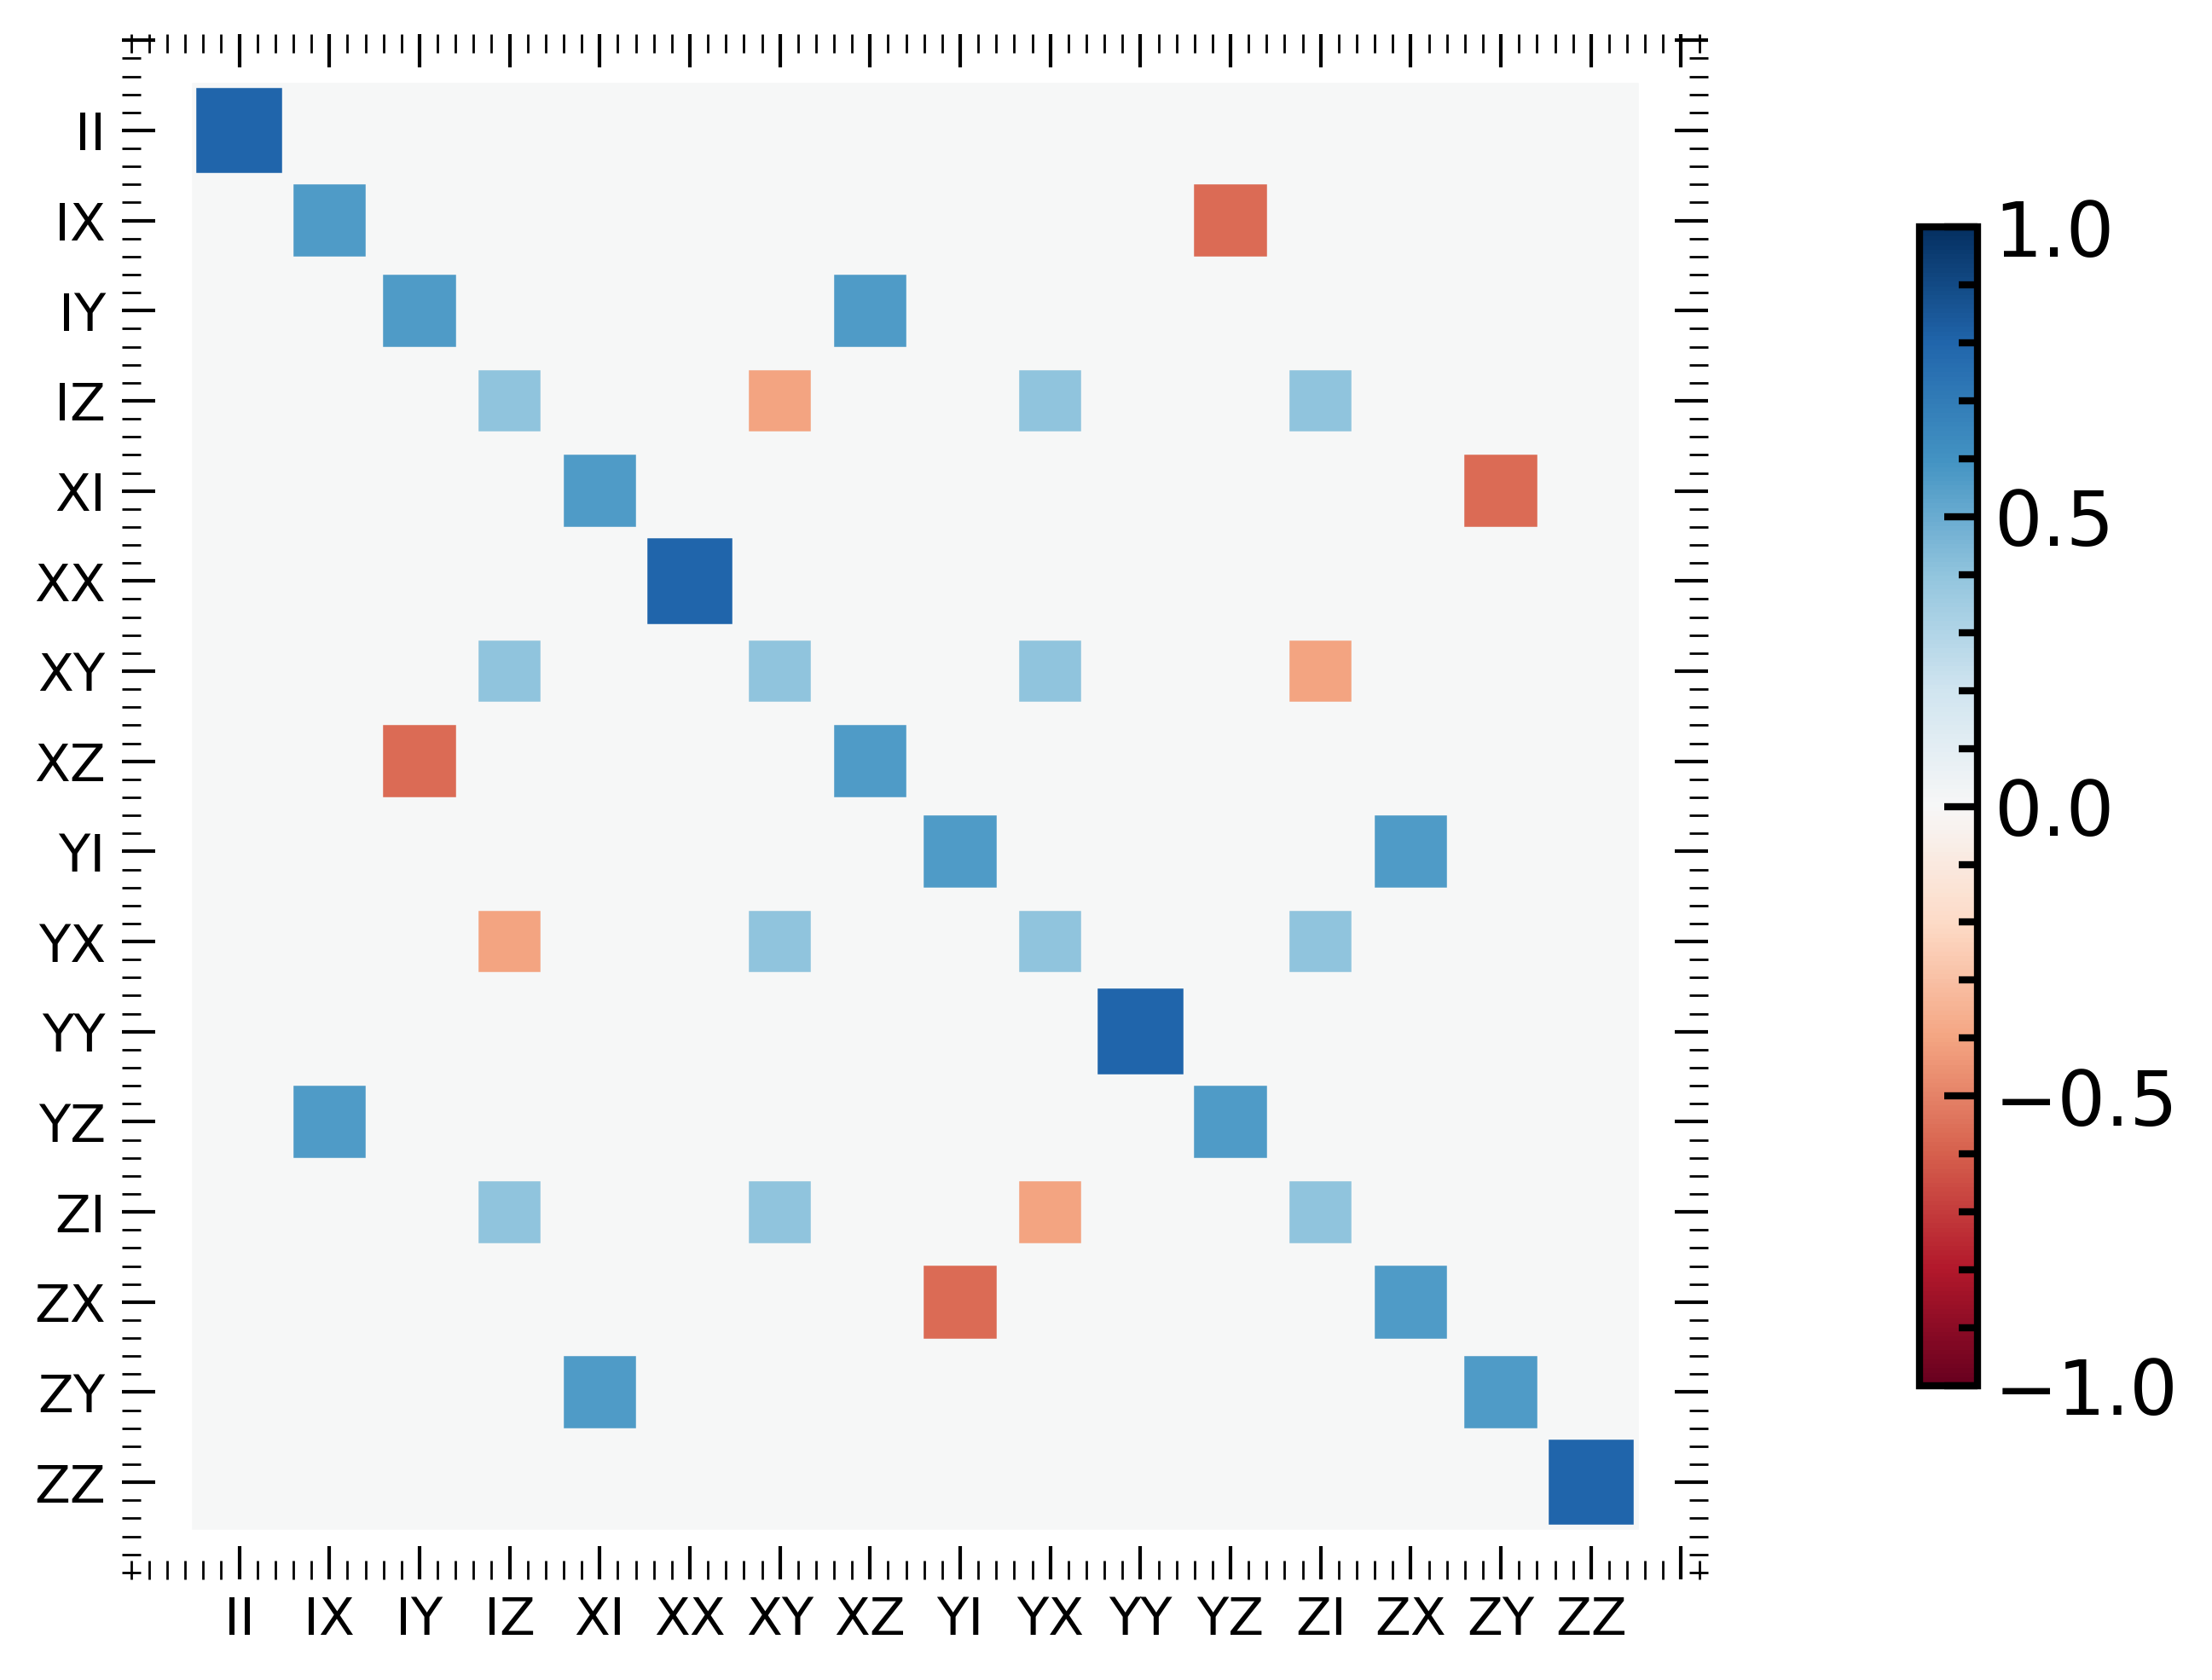

In [36]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))

phi = np.pi

ZZ_unitary = np.diag([np.exp(-1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(-1j*phi/2.0)])
ZZ_unitary = Qobj(ZZ_unitary)
ZZ_unitary.dims = [[2,2],[2,2]]

# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
# gate_op = cphase(np.pi)
# gate_op = sqrtiswap()#*tensor(rz(1.1), qeye(2))*tensor(qeye(2),rz(0.9))
gate_op = sqrtiswap()
# gate_op=cphase(-2.16075)*tensor(rz(0.1394),rz(2.78789))*sqrtiswap_matrix
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        p_out[i,j] = expect(rot_j, gate_op*(rot_i*gnd_state))        
ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]

str_primitive = ["I","X","Y","Z"]
op_label = []
for prim1 in str_primitive:
    for prim2 in str_primitive:
        op_label.append(prim1+prim2)
# print (op_label)
plt.figure(figsize = [30,30])
fig,ax=qutip.hinton(ptm_ideal_2q, xlabels = op_label, ylabels = op_label, label_top=False)

ax.tick_params(axis='both', labelsize=11, which = 'major', width=0.75, top = True, right = True, direction = 'in')
ax.tick_params(axis='both', labelsize=11, which = 'minor', width=0.5, top = True, right = True, direction = 'in')
# plt.savefig('/Users/longnguyen/Google Drive/LBL Research/Illustration/Heisenberg paper/QPT_iSWAP_ideal.pdf')

In [10]:
ptm_ideal_2q

array([[ 1.00000000e+00,  5.15612619e-17,  1.75557635e-16,
        -6.96214835e-17,  3.13661143e-17, -2.89271369e-17,
         5.85728195e-17, -2.41450370e-17, -7.39075265e-18,
         1.07145077e-16, -8.25481811e-17,  9.06574795e-17,
         2.88862107e-17, -2.41450370e-17,  1.18413055e-16,
         4.42340681e-17],
       [-2.50344745e-16,  7.07106781e-01, -2.40964772e-17,
         1.66273459e-16, -2.21560143e-16, -6.93903889e-17,
        -2.04436163e-16,  2.17556794e-16,  1.12195265e-16,
        -9.42425725e-17,  1.08534716e-16,  7.07106781e-01,
        -2.37308861e-16, -1.12195265e-16, -1.51756848e-16,
        -6.02883755e-17],
       [ 2.59936608e-16, -2.07634807e-16,  7.07106781e-01,
        -5.78280441e-17,  3.62319951e-16,  9.28837235e-17,
         2.23794268e-16, -7.07106781e-01,  1.12642628e-17,
        -1.50347975e-16, -9.52559950e-18, -1.52123656e-16,
        -3.99642908e-17, -2.51420506e-17,  4.73847416e-17,
        -9.80327175e-17],
       [ 3.24955795e-16, -3.82983338e

## Single-qubit gate

In [11]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

p_in = np.zeros((4,4))
p_out = np.zeros((4,4))

gate = ry(np.pi/2)

prep_rotations = [I, sx, sx2, sy2]
meas_rotations = [I, sx, sy, sz]
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
        p_out[i,j] = expect(meas, gate*prep*basis(2,0))
        
ptm_ideal_1q =  np.linalg.lstsq(p_in, p_out)[0] 
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal_1q, xlabels = op_label, ylabels = op_label)

NameError: name 'I' is not defined

# Quantum process tomography for $\chi$
## Single qubit gate

In [ ]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*basis(2,0)
    rho = ket2dm(rho)
    rho_input.append(rho)
    
gate_op = qeye(2)
# Assume that the output states can be determined via quantum state tomography
rho_output = []
for idx in range (len(rho_input)):
    rho = gate_op*rho_input[idx]*gate_op
    rho_output.append(rho)

    #Decoherence process
#Relaxation
# gamma1 = 1
# gamma2 = 1
# t = 5
# rho_output[0] = np.array([[np.exp(-gamma1*t), 0], [0, 1-np.exp(-gamma1*t)]])
# rho_output[1] = np.array([[0,0],[0,1]])
# rho_output[2] = np.array([[0.5*np.exp(-gamma1*t),0.5*np.exp(-gamma1*t/2)],[0.5*np.exp(-gamma1*t/2), 1-0.5*np.exp(-gamma1*t)]])
# rho_output[3] = np.array([[0.5*np.exp(-gamma1*t),-0.5j*np.exp(-gamma1*t/2)],[0.5j*np.exp(-gamma1*t/2),1-0.5*np.exp(-gamma1*t)]])
#Dephasing
# rho_output[0] = np.array([[1,0],[0,0]])
# rho_output[1] = np.array([[0,0],[0,1]])
# rho_output[2] = np.array([[0.5,0.5*np.exp(-gamma2*t)],[0.5*np.exp(-gamma2*t),0.5]])
# rho_output[3] = np.array([[0.5,-0.5j*np.exp(-gamma2*t)],[0.5j*np.exp(-gamma2*t),0.5]])

# Quantum process tomography
n = 1
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(4):
    for k in range(4):
        la[k+4*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(4):
            for n in range(4):
                 beta[k+4*j, n+4*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (4,4)).transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["","$I$", "$X$", "$Y$", "$Z$"] for i in range (1)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

## Two-qubit gate

(<Figure size 3200x2400 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f9a852c2f10>)

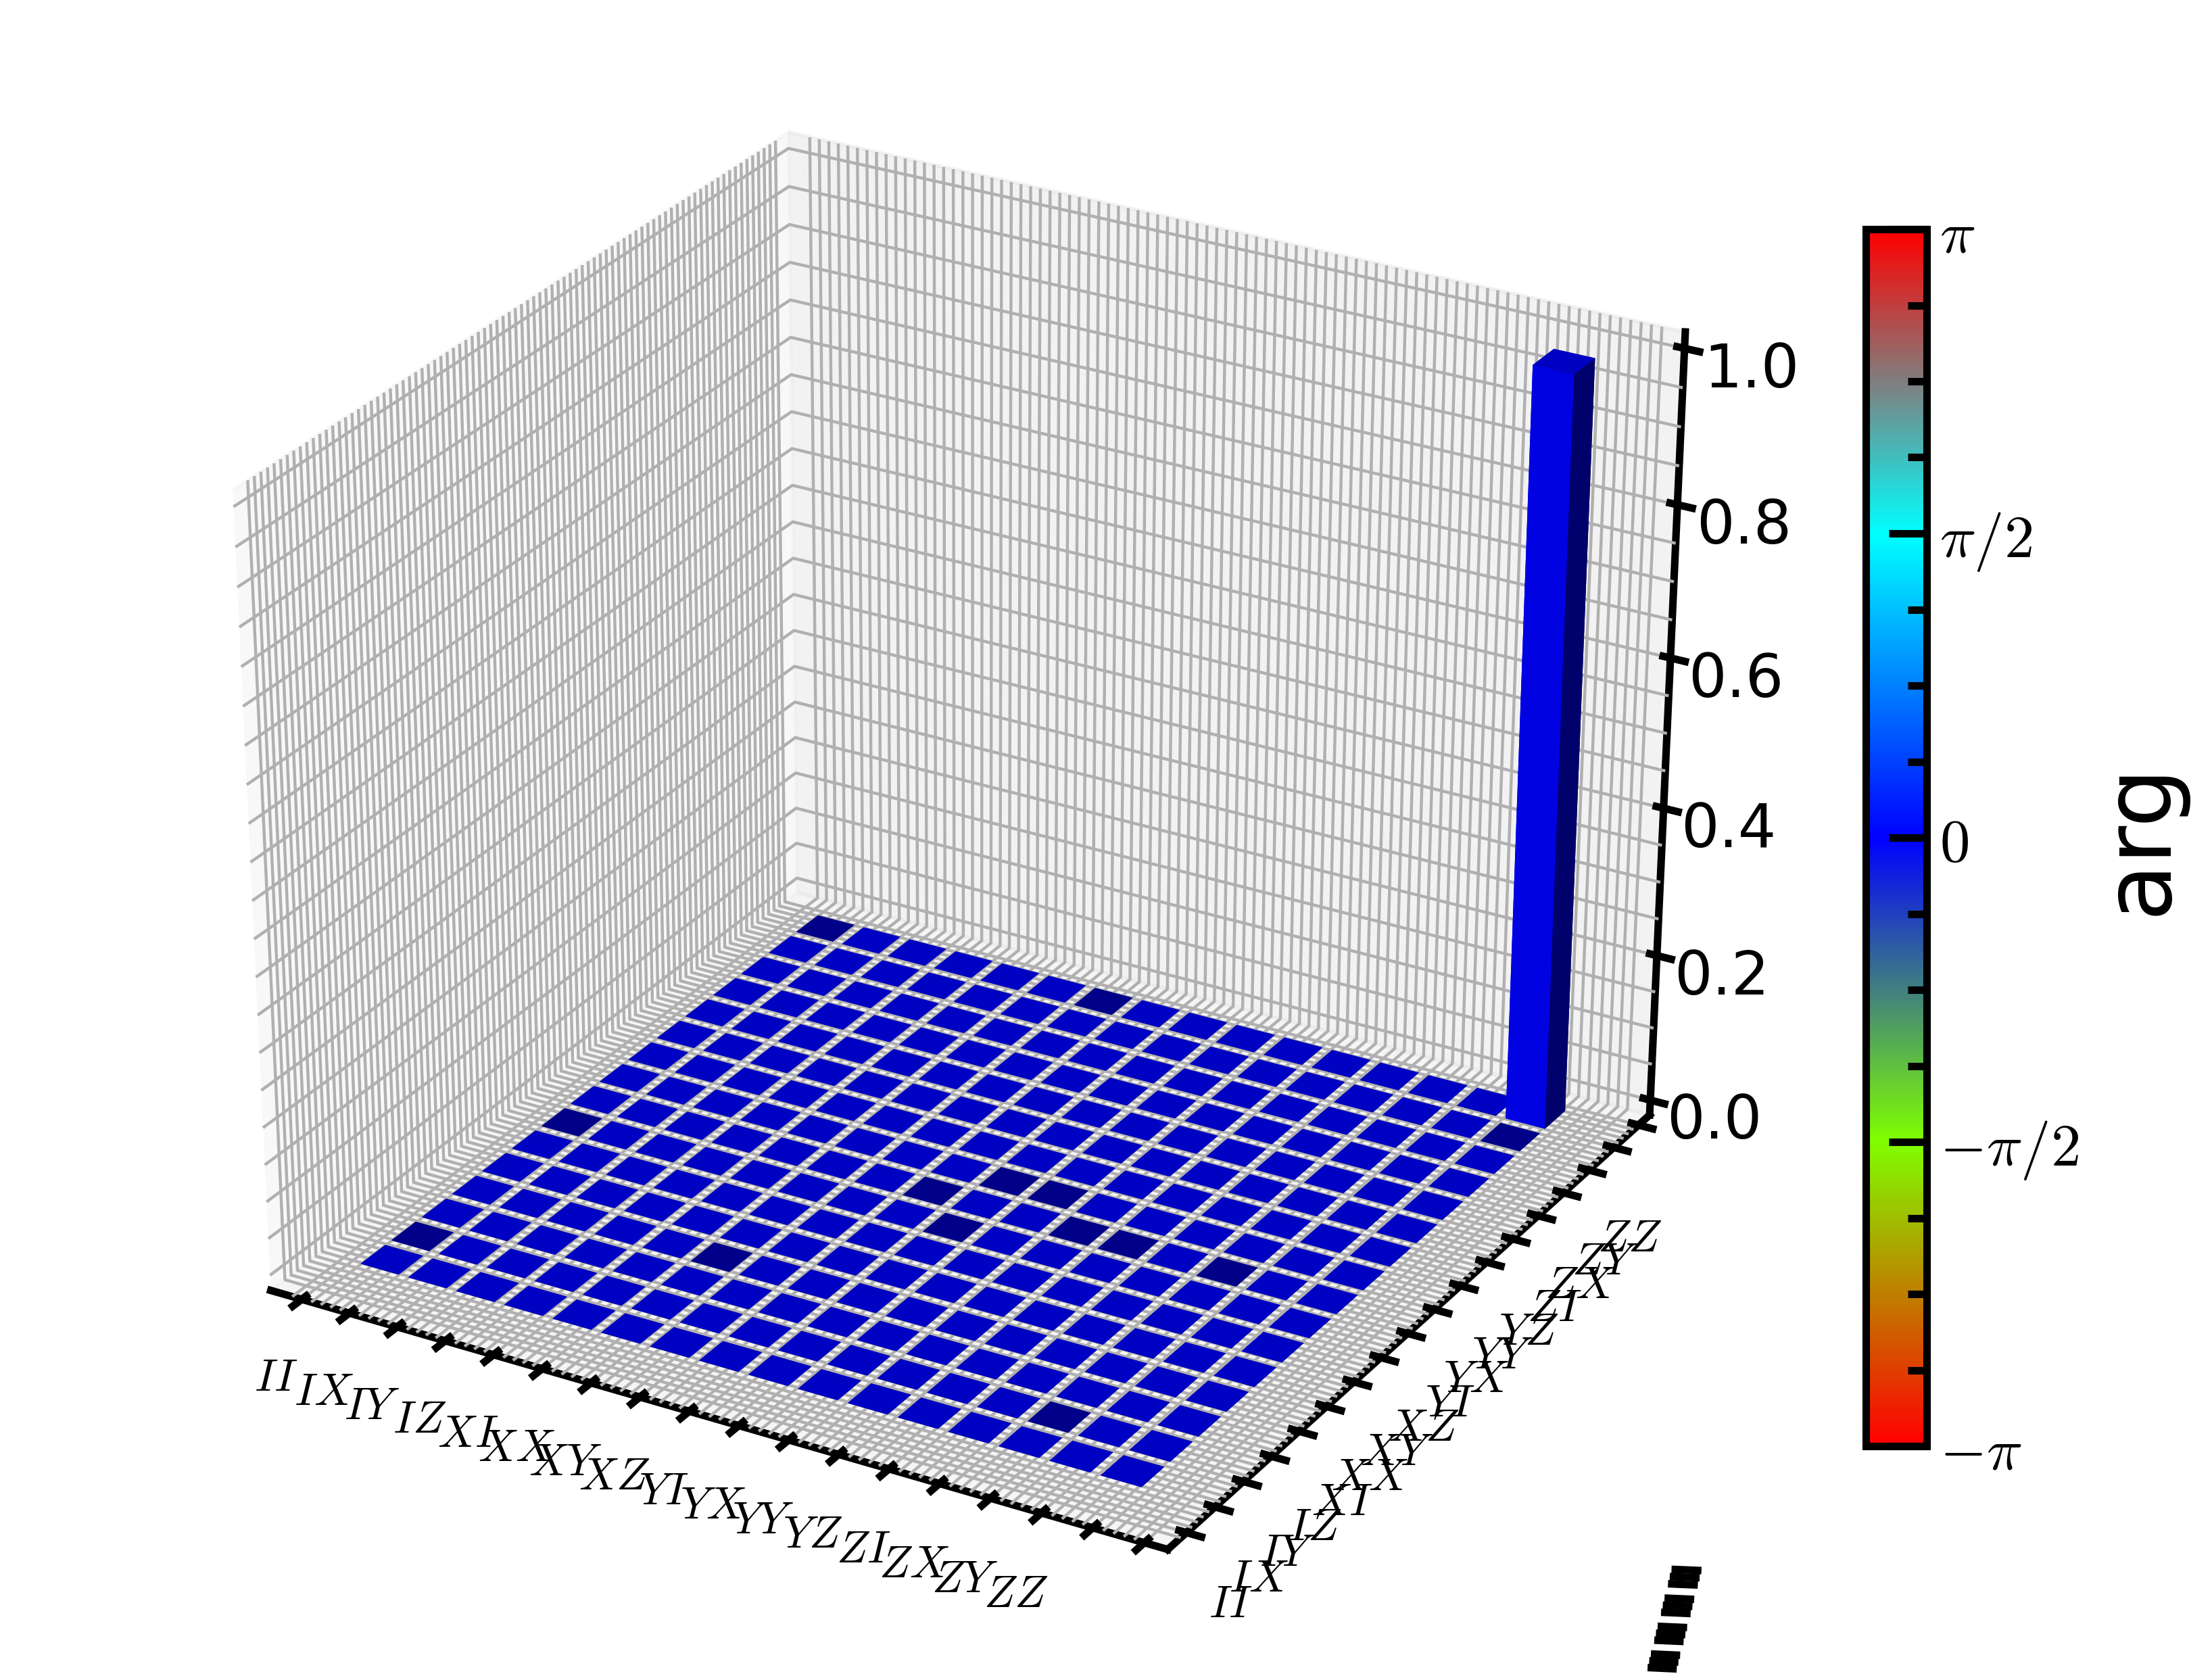

In [14]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
# gate_op = cphase(np.pi)
gate_op = iswap()*iswap()
# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*gnd_state
    rho = ket2dm(rho)
    rho_input.append(rho)
    
# Assume that the output states can be determined via quantum state tomography
rho_output = []
for idx in range (len(rho_input)):
    rho = gate_op*rho_input[idx]*gate_op
    rho_output.append(rho)

# Quantum process tomography
n = 2
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(16):
    for k in range(16):
        la[k+16*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(16):
            for n in range(16):
                 beta[k+16*j, n+16*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (16,16)).transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range (2)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

## Converting PTM to $\chi$
### Single-qubit gate

In [ ]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*basis(2,0)
    rho = ket2dm(rho)
    rho_input.append(rho)

    gate = ry(np.pi/2)
# Reconstruct the output states from PTM data
p_in = np.zeros((4,4))
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
#         p_out[i,j] = expect(meas, gate*prep*basis(2,0))

p_out = p_in@ptm_ideal_1q

rho_output = []
for idx in range (len(rho_input)):
    rho = 0
    for j, meas in enumerate(meas_rotations):
        rho = rho + 0.5*p_out[idx,j]*meas
    rho_output.append(rho)
    
# Quantum process tomography
n = 1
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(4):
    for k in range(4):
        la[k+4*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(4):
            for n in range(4):
                 beta[k+4*j, n+4*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (4,4)).transpose()
op_label = [["","$I$", "$X$", "$Y$", "$Z$"] for i in range (1)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

### Two-qubit gate

(<Figure size 3200x2400 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f9a5af0a7c0>)

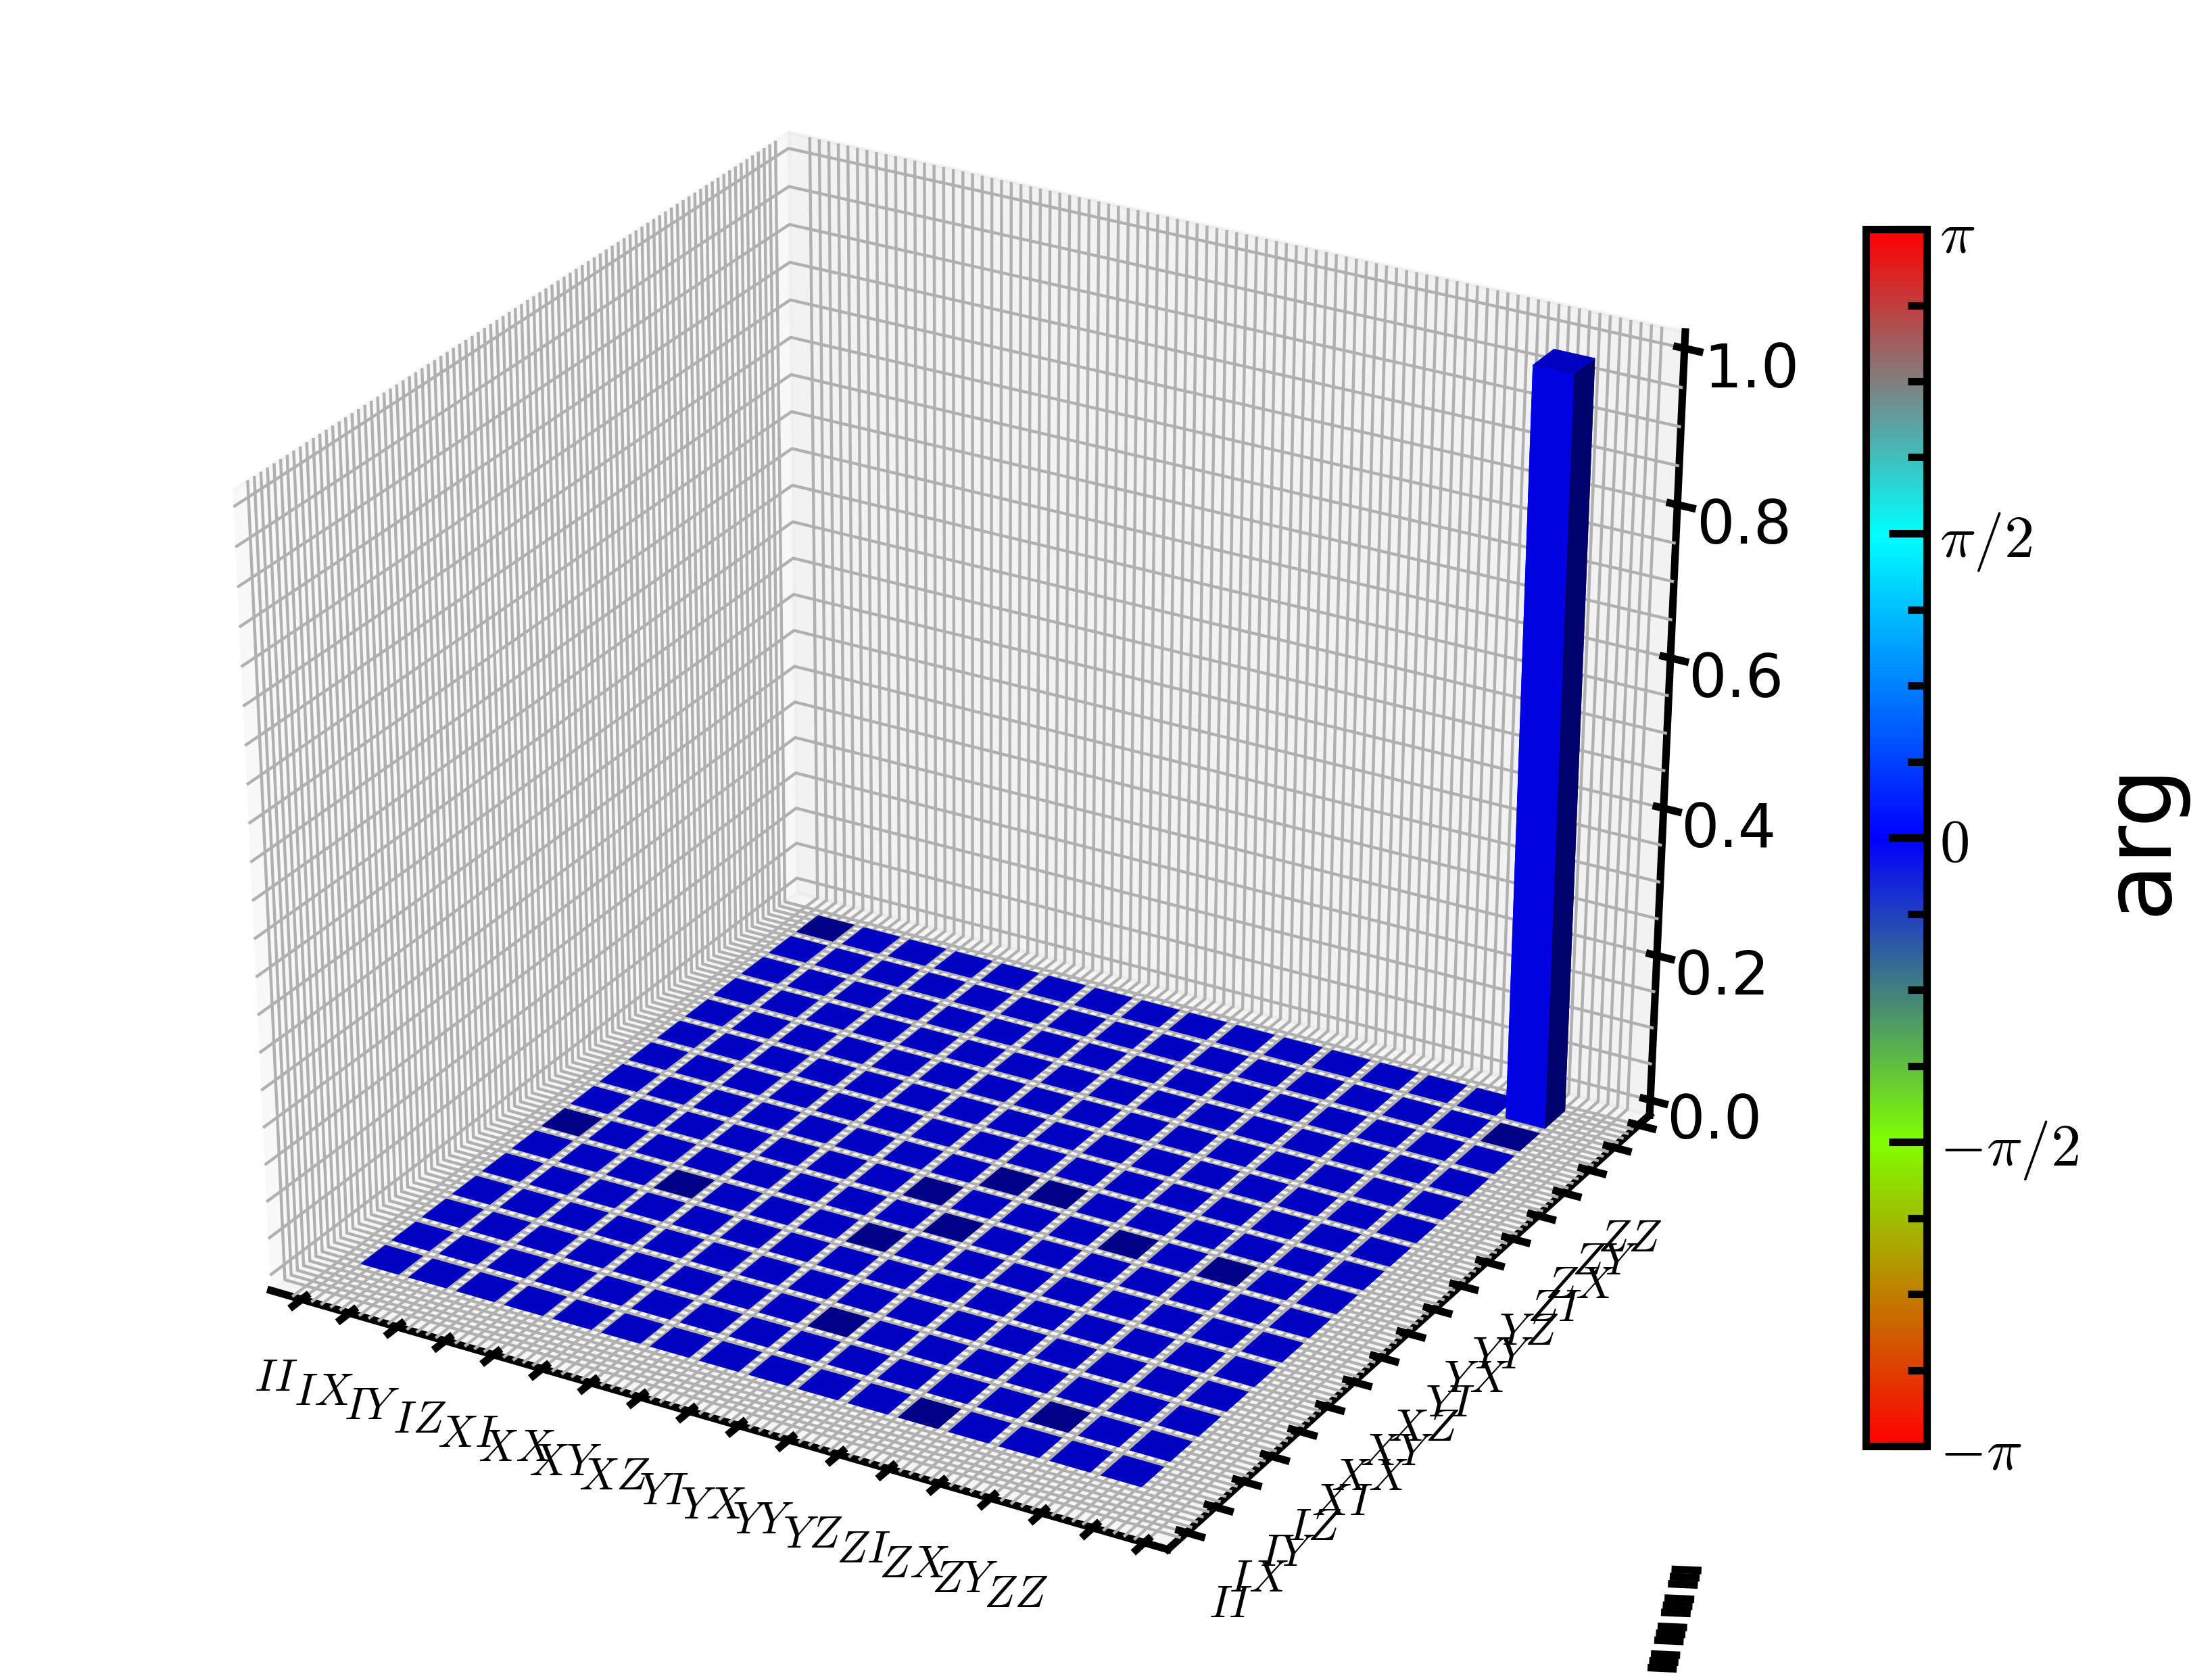

In [15]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16))  
gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
# gate_op = cphase(np.pi)
gate_op = sqrtiswap()
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        
# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*gnd_state
    rho = ket2dm(rho)
    rho_input.append(rho)
    
#Get output states from PTM    
p_out = p_in@ptm_ideal_2q
rho_output = []
for idx in range (len(rho_input)):
    rho = 0
    for j, meas in enumerate(meas_rotations):
        rho = rho + 0.25*p_out[idx,j]*meas
    rho_output.append(rho)
    
# Quantum process tomography
n = 2
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(16):
    for k in range(16):
        la[k+16*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(16):
            for n in range(16):
                 beta[k+16*j, n+16*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (16,16))#.transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range (2)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)    

In [ ]:
fname = '/Users/longnguyen/Downloads/CZ_chi.txt'
data = np.genfromtxt(fname)
print (data.shape)

# ZZ measurement
Here we emulate what we see when we measure the ZZ interaction between qubits

In [22]:
from qutip.qip.operations import*
from scipy.optimize import curve_fit
#Define some useful functions. Independent from previous cells

def bare_qubit(freq):
    #Two-level system
    return -0.5*2*np.pi*freq*sigmaz()

def cos_fit(t,amp,freq,c):
    return amp*np.cos(2*np.pi*freq*t+c)

def coupled_qubits(freq1, freq2, zetaZZ):
    #Coupled two-level system
    iz = tensor(qeye(2), sigmaz())
    zi = tensor(sigmaz(), qeye(2))
    zz = tensor(sigmaz(), sigmaz())
    return -0.5*2*np.pi*(freq1*zi + freq2*iz +zetaZZ*zz)

In [214]:
IZ = tensor(qeye(2), sigmaz())
ZI = tensor(sigmaz(), qeye(2))
XI = tensor(sigmax(), qeye(2))
IX = tensor(qeye(2), sigmax())
YI = tensor(sigmay(), qeye(2))
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())
X2I = tensor(rx(np.pi/2), sigmax())
             
psi_0 = tensor(basis(2,0),basis(2,0))
psi_sup0 = X2I*psi_0
psi_sup1 = X2I*IX*psi_0

zii = tensor(sigmaz(), qeye(2), qeye(2))
izi = tensor(qeye(2), sigmaz(), qeye(2))
iiz = tensor(qeye(2), qeye(2), sigmaz())
izz = tensor(qeye(2), sigmaz(), sigmaz())
zzi = tensor(sigmaz(), sigmaz(), qeye(2))
ziz = tensor(sigmaz(), qeye(2), sigmaz())
zzz = tensor(sigmaz(), sigmaz(), sigmaz())
    
def three_coupled_qubits(freq1, freq2, freq3, zetaZZI, zetaIZZ, zetaZIZ, zetaZZZ):
    #Coupled two-level systems. We omit the ZIZ term for now
    return -0.5*2*np.pi*(freq1*zii + freq2*izi + freq3*iiz 
                         + zetaZZI*zzi + zetaIZZ*izz + zetaZIZ*ziz + zetaZZZ*zzz)

## Conditionality

In [305]:
def ZZ_gate(phi):
    ZZ_unitary = np.diag([np.exp(-1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(-1j*phi/2.0)])
    ZZ_unitary = Qobj(ZZ_unitary)
    ZZ_unitary.dims = [[2,2],[2,2]]
    return ZZ_unitary

gate = cphase(np.pi)
gate = ZZ_gate(np.pi/2)
gate = iswap()*ZZ_gate(np.pi*2)

sx0 = expect(XI,gate*psi_sup0)
sy0 = expect(YI,gate*psi_sup0)
sz0 = expect(ZI,gate*psi_sup0)
sx1 = expect(XI,gate*psi_sup1)
sy1 = expect(YI,gate*psi_sup1)
sz1 = expect(ZI,gate*psi_sup1)
R = 0.5*np.sqrt((sx0-sx1)**2 + (sy0-sy1)**2+(sz0-sz1)**2)
R

0.0

## Ramsey measurement
### Unitary

In [ ]:
Y2I = tensor(ry(-np.pi/2),qeye(2))
IX = tensor(qeye(2), rx(np.pi))
XX = tensor(rx(np.pi),rx(np.pi))
varphi_array = np.linspace(-np.pi,np.pi,61)

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


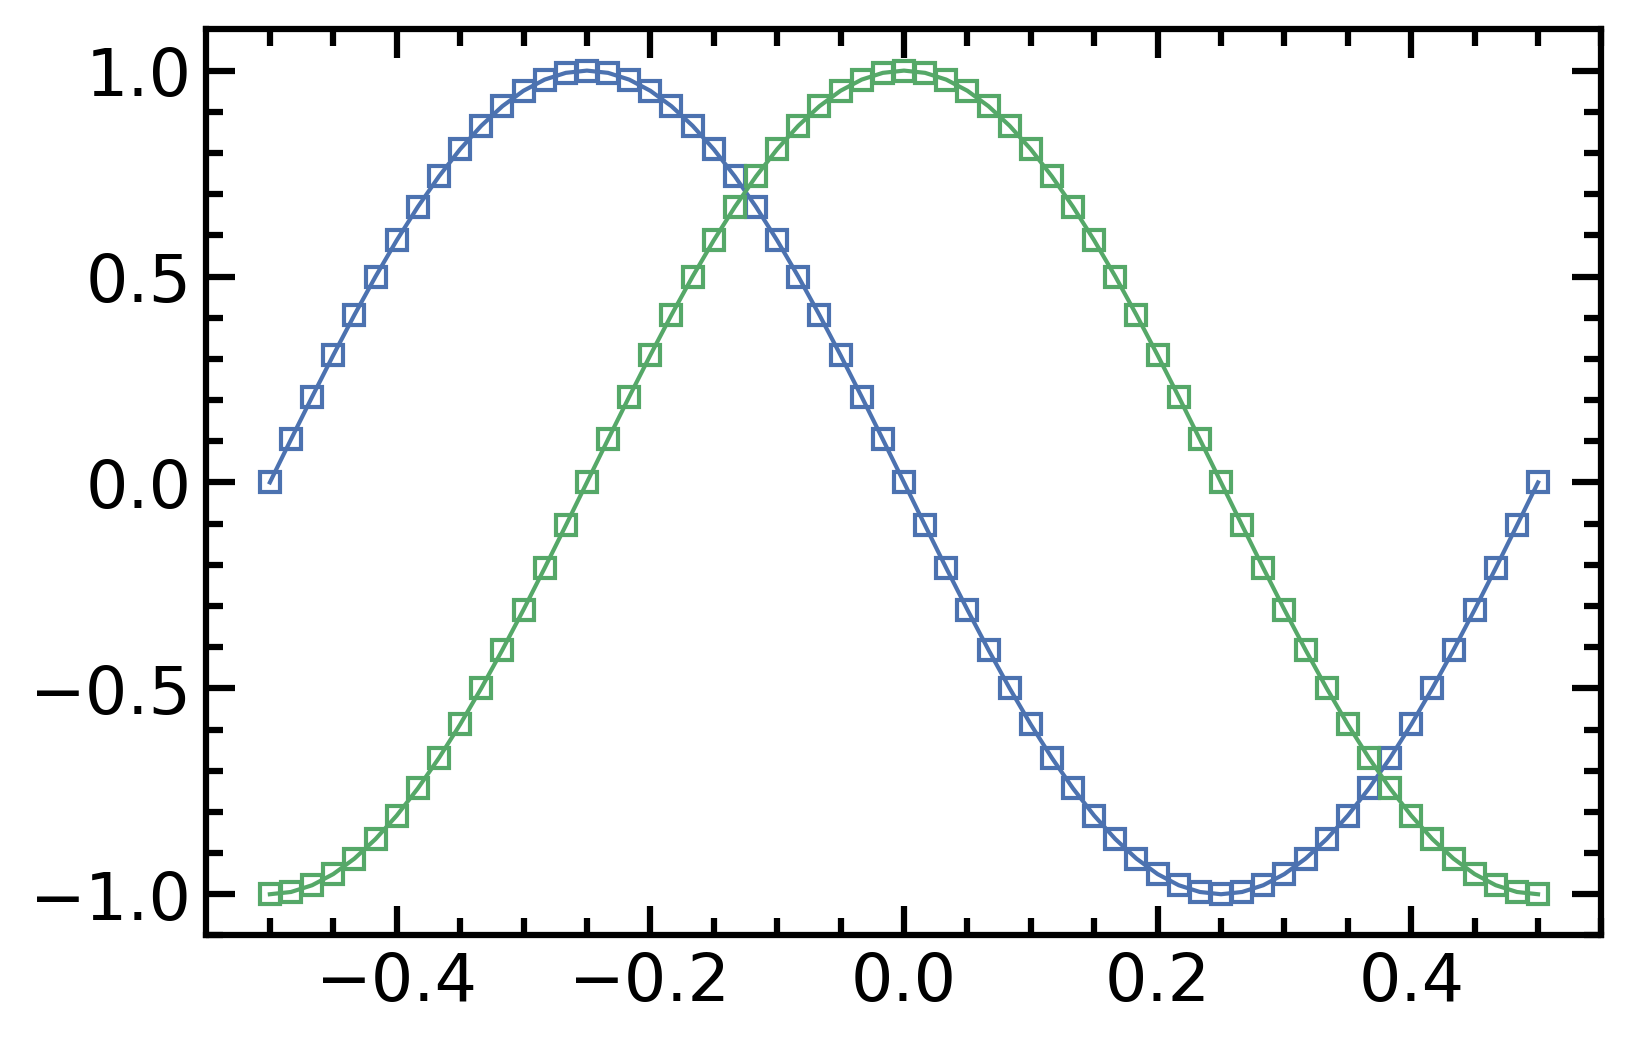

In [235]:
gate = ZZ_gate(np.pi/2)
Z_offset = tensor(rz(np.pi/2),qeye(2))
for idx, varphi in enumerate(varphi_array):
    ZI = tensor(rz(varphi),qeye(2))
    circuit = X2I*ZI*gate*X2I*tensor(basis(2,0),basis(2,0))
    proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    circuit = X2I*ZI*Z_offset*gate*X2I*tensor(basis(2,0),basis(2,1))
    proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    
    
plt.errorbar(varphi_array/np.pi/2,proj0, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
plt.errorbar(varphi_array/np.pi/2,proj1, fmt='s', mfc='none', mew=1.0, mec='C1', ms = 5.0)

opt0,cov0 = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [1, 0.1, 0], xtol = 1e-10)
plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt0), linewidth = 1.0, color = 'C0',label=r'$|c=0\rangle$')
opt1,cov1 = curve_fit(cos_fit, ydata = proj1, xdata = varphi_array, p0 = [1, 0.1, 0], xtol = 1e-10)
plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt1), linewidth = 1.0, color = 'C1',label=r'$|c=1\rangle$')

### Single-qubit

TypeError: cos_fit() takes 4 positional arguments but 5 were given

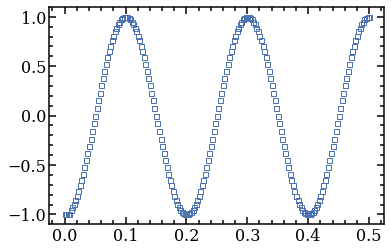

In [6]:
#To get some intuition, first consider a Ramsey measurement
h0 = bare_qubit(5) #Note that this the lab frame, so the measurement give us the rotation freq in the lab frame.
# h0 = bare_qubit(0.1) #Rotating frame instead. The freq is the detuning between drive and qubit
_,eig_vec = h0.eigenstates()
ini_state = eig_vec[0]

t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = ry(np.pi/2)*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h0, state_1, t_list).states
    state_3 = ry(np.pi/2)*state_2[-1]
    meas_result[t_idx] = expect(sigmaz(),state_3)

plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation')

opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-8)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit')

plt.ylabel(r'$\langle Z \rangle$')
plt.xlabel(r'Time (ns)')
plt.legend()
print ("Frequency is: " + str(opt[1]) + 'GHz')

### Two_qubit: Conditional Ramsey

In [ ]:
#Conditional Ramsey
h = coupled_qubits(5,5.1,0.01) #Lab frame
_,eig_vec = h.eigenstates()
ini_state = eig_vec[0]
t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2)),state_3)

plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
freq_00 = opt[1]
print ("Frequency of 00 is: " + str(freq_00) + 'GHz')

ini_state = eig_vec[2]
t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2)),state_3)

plt.errorbar(t_sweep,meas_result, fmt='d', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')

plt.ylabel(r'$\langle Z \rangle$')
plt.xlabel(r'Time (ns)')
plt.legend()

freq_01 = opt[1]
print ("Frequency of 01 is: " + str(freq_01) + 'GHz')
print ("zz rate is: " + str(abs(freq_01-freq_00)/2.0) + 'GHz')

### Three qubits, no ZZZ case

In [ ]:
## NO ZZZ
h = three_coupled_qubits(freq1=1.0, freq2=1.1, freq3=1.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.00) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10

ini_state = eig_vec[0] #000
t_sweep = np.linspace(0,T_gate,101) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_000 = opt[1]
print ("f_000=" + str(freq_000) + 'GHz')

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_010 = opt[1]
print ("f_010=" + str(freq_010) + 'GHz')

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_001 = opt[1]
print ("f_001=" + str(freq_001) + 'GHz')

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_011 = opt[1]
print ("f_011=" + str(freq_011) + 'GHz')

In [7]:
print ((freq_000-freq_010)/2)
print ((freq_001-freq_011)/2)

print ((freq_000-freq_001)/2)
print ((freq_010-freq_011)/2)

NameError: name 'freq_000' is not defined

### Three-qubit, add ZZZ


TypeError: cos_fit() takes 4 positional arguments but 5 were given

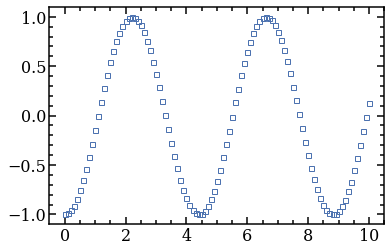

In [8]:
## NO ZZZ
h = three_coupled_qubits(freq1=0.2, freq2=0.3, freq3=0.4, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.002) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10

ini_state = eig_vec[0] #000
t_sweep = np.linspace(0,T_gate,101) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_000 = opt[1]
print ("f_000=" + str(freq_000) + 'GHz')

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_010 = opt[1]
print ("f_010=" + str(freq_010) + 'GHz')

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_001 = opt[1]
print ("f_001=" + str(freq_001) + 'GHz')

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_011 = opt[1]
print ("f_011=" + str(freq_011) + 'GHz')

In [ ]:
print ((freq_000-freq_010)/2)
print ((freq_001-freq_011)/2)

print ((freq_000-freq_001)/2)
print ((freq_010-freq_011)/2)

print (((freq_000-freq_010)/2 - (freq_001-freq_011)/2)/2)
print (((freq_000-freq_001)/2- (freq_010-freq_011)/2)/2)

## JAZZ measurement

TypeError: cos_fit() takes 4 positional arguments but 5 were given

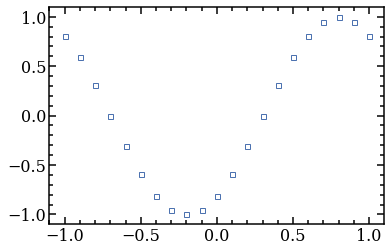

In [14]:
#Now, using JAZZ sequence
h = coupled_qubits(5,5.1,0.01) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10 #ns
t_list = np.linspace(0,T_gate/2,int(20*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_sweep)

ini_state = eig_vec[0]
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi),rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi), qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.1, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
phase_00 = opt[2]/(2*np.pi)
# print ("Frequency of 00 is: " + str(freq_00) + 'GHz')

ini_state = eig_vec[2]
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi),rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi), qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C2', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.1, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
plt.ylabel(r'$\langle ZI \rangle$')
plt.xlabel(r'$\theta_Z/\pi$')

phase_01 = opt[2]/(2*np.pi)
zz_rate = abs(phase_00 - phase_01)/T_gate/2
print ('ZZ rate = ',str(zz_rate),' GHz')

## JAZZ with unitaries

In [335]:
IZ = tensor(qeye(2), sigmaz())
ZI = tensor(sigmaz(), qeye(2))
XI = tensor(sigmax(), qeye(2))
IX = tensor(qeye(2), sigmax())
YI = tensor(sigmay(), qeye(2))
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())

psi_ini00 = tensor(basis(2,0), basis(2,0))
psi_ini01 = tensor(basis(2,0), basis(2,1))
psi_ini10 = tensor(basis(2,1), basis(2,0))
psi_ini11 = tensor(basis(2,1), basis(2,1))

sup_state0 = (psi_ini0 + psi_ini01)/np.sqrt(2)
sup_state1 = (psi_ini10 + psi_ini11)/np.sqrt(2)

def R(x):
    phi=x[0]
    ZZ_unitary = np.diag([np.exp(-1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(-1j*phi/2.0)])
    ZZ_unitary = Qobj(ZZ_unitary)
    ZZ_unitary.dims = [[2,2],[2,2]]
    gate = iswap()
    sx0 = expect(IX,gate*sup_state0)
    sy0 = expect(IY,gate*sup_state0)
    sz0 = expect(IZ,gate*sup_state0)
    sx1 = expect(IX,gate*sup_state1)
    sy1 = expect(IY,gate*sup_state1)
    sz1 = expect(IZ,gate*sup_state1)
    R = 0.5*np.sqrt((sx0-sx1)**2 + (sy0-sy1)**2+(sz0-sz1)**2)
    return R
R([0])

0.9999999999999998

### ZZ

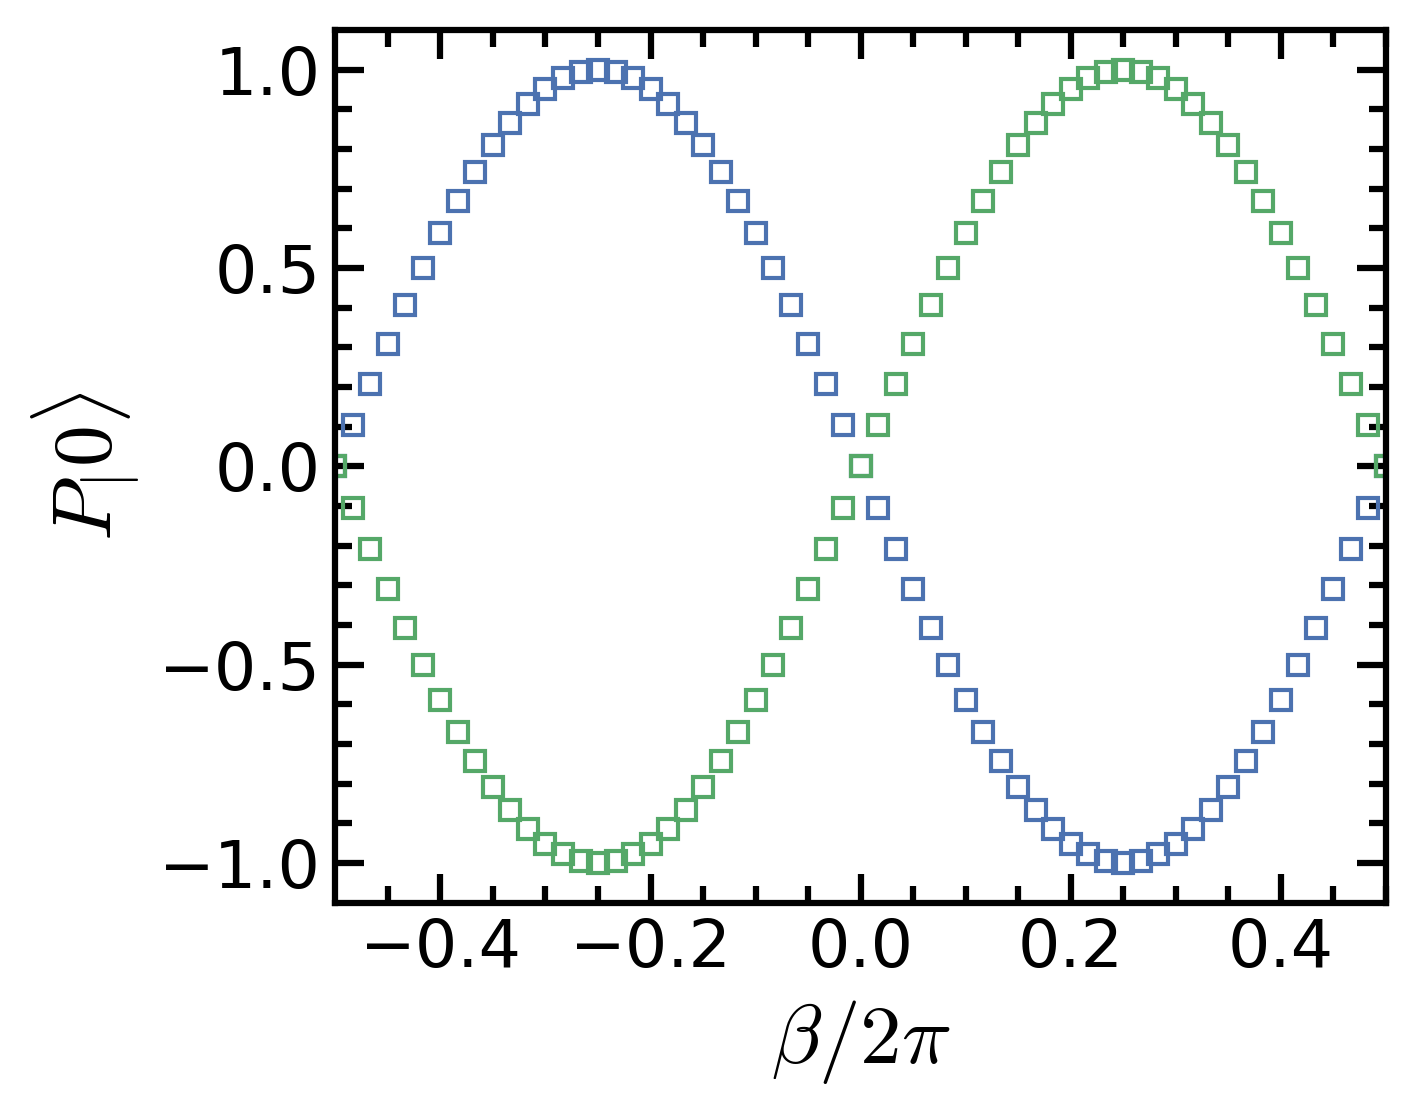

In [326]:
plt.figure(figsize=[5,4])
psi_ini0 = tensor(basis(2,0), basis(2,0))
psi_ini1 = tensor(basis(2,0), basis(2,1))

phi = np.pi/4
ZZ_unitary = np.diag([np.exp(-1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(1j*phi/2.0),np.exp(-1j*phi/2.0)])
ZZ_unitary = Qobj(ZZ_unitary)
ZZ_unitary.dims = [[2,2],[2,2]]
Y2Im = tensor(ry(-np.pi/2),qeye(2))
Y2Ip = tensor(ry(np.pi/2),qeye(2))
X2I = tensor(rx(np.pi/2),qeye(2))
IX = tensor(qeye(2), rx(np.pi))
XX = tensor(rx(np.pi),rx(np.pi))
varphi_array = np.linspace(-np.pi,np.pi,61)

proj0 = np.zeros_like(varphi_array)
proj1 = np.zeros_like(varphi_array)

for idx, varphi in enumerate(varphi_array):
    ZI = tensor(rz(varphi),qeye(2))
    circuit = Y2Im*ZI*ZZ_unitary*ZZ_unitary*Y2Ip*psi_ini0
    proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    circuit = Y2Im*ZI*ZZ_unitary*ZZ_unitary*Y2Ip*psi_ini1
    proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
#     circuit = X2I*ZI*ZZ_unitary*X2I*psi_ini0
#     proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
#     circuit = X2I*ZI*ZZ_unitary*X2I*psi_ini1
#     proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    
    
plt.errorbar(varphi_array/np.pi/2,proj0, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
plt.errorbar(varphi_array/np.pi/2,proj1, fmt='s', mfc='none', mew=1.0, mec='C1', ms = 5.0)

# np.save('/Users/longnguyen/Documents/Data/iSWAP/varphi_array.npy', varphi_array)
# np.save('/Users/longnguyen/Documents/Data/iSWAP/JAZZ_0.npy', proj0)
# np.save('/Users/longnguyen/Documents/Data/iSWAP/JAZZ_1.npy', proj1)

# opt0,cov0 = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [1, 0.1, 0], xtol = 1e-10)
# plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt0), linewidth = 1.0, color = 'C0',label=r'$|c=0\rangle$')
# opt1,cov1 = curve_fit(cos_fit, ydata = proj1, xdata = varphi_array, p0 = [1, 0.1, 0], xtol = 1e-10)
# plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt1), linewidth = 1.0, color = 'C1',label=r'$|c=1\rangle$')
# print ((opt1[2]-opt0[2])%(2*np.pi)/(2*(n+1))/np.pi)
# varphi_nice = np.linspace(-np.pi, np.pi,101)
# angle = varphi_nice[np.argmin(cos_fit(varphi_nice,*opt0))] - varphi_nice[np.argmin(cos_fit(varphi_nice,*opt1))]
# print ((angle%(2*np.pi))/np.pi/8)

plt.ylabel(r'$P_|0\rangle$')
plt.xlabel(r'$\beta/2\pi$')
plt.xlim([varphi_array[0]/np.pi/2,varphi_array[-1]/np.pi/2])
# plt.legend()
plt.tight_layout()
# plt.savefig('/Users/longnguyen/Google Drive/LBL Research/Illustration/Heisenberg paper/JAZZ_0.pdf')

### with iSWAP

In [267]:
phi = np.pi/2
ZZ_unitary = np.diag([np.exp(-1j*phi/2),np.exp(1j*phi/2),np.exp(1j*phi/2),np.exp(-1j*phi/2)])
ZZ_unitary = Qobj(ZZ_unitary)
ZZ_unitary.dims = [[2,2],[2,2]]
tensor(rz(np.pi), rz(np.pi))*iswap()*ZZ_unitary*np.exp(1j*np.pi/4)

# def distance(x):
#     angle1 = x[0]
#     angle2 = x[1]
#     U_real = tensor(rz(angle1), rz(angle2))*iswap()*ZZ_unitary
#     U_ideal = swap()
#     op1 = U_real.dag() * U_real
#     op2 = U_real * U_ideal.dag()
#     fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
#     return (1.0 - fidel)
# x0 = [np.pi/4,np.pi/4] #guess
# xopt = minimize(distance,x0, method ='Nelder-Mead', tol = 1e-8)
# print (xopt.x/np.pi)
# print (distance(xopt.x))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0. -1.]]

0.125
2.356194490192345
0.12500000000000008


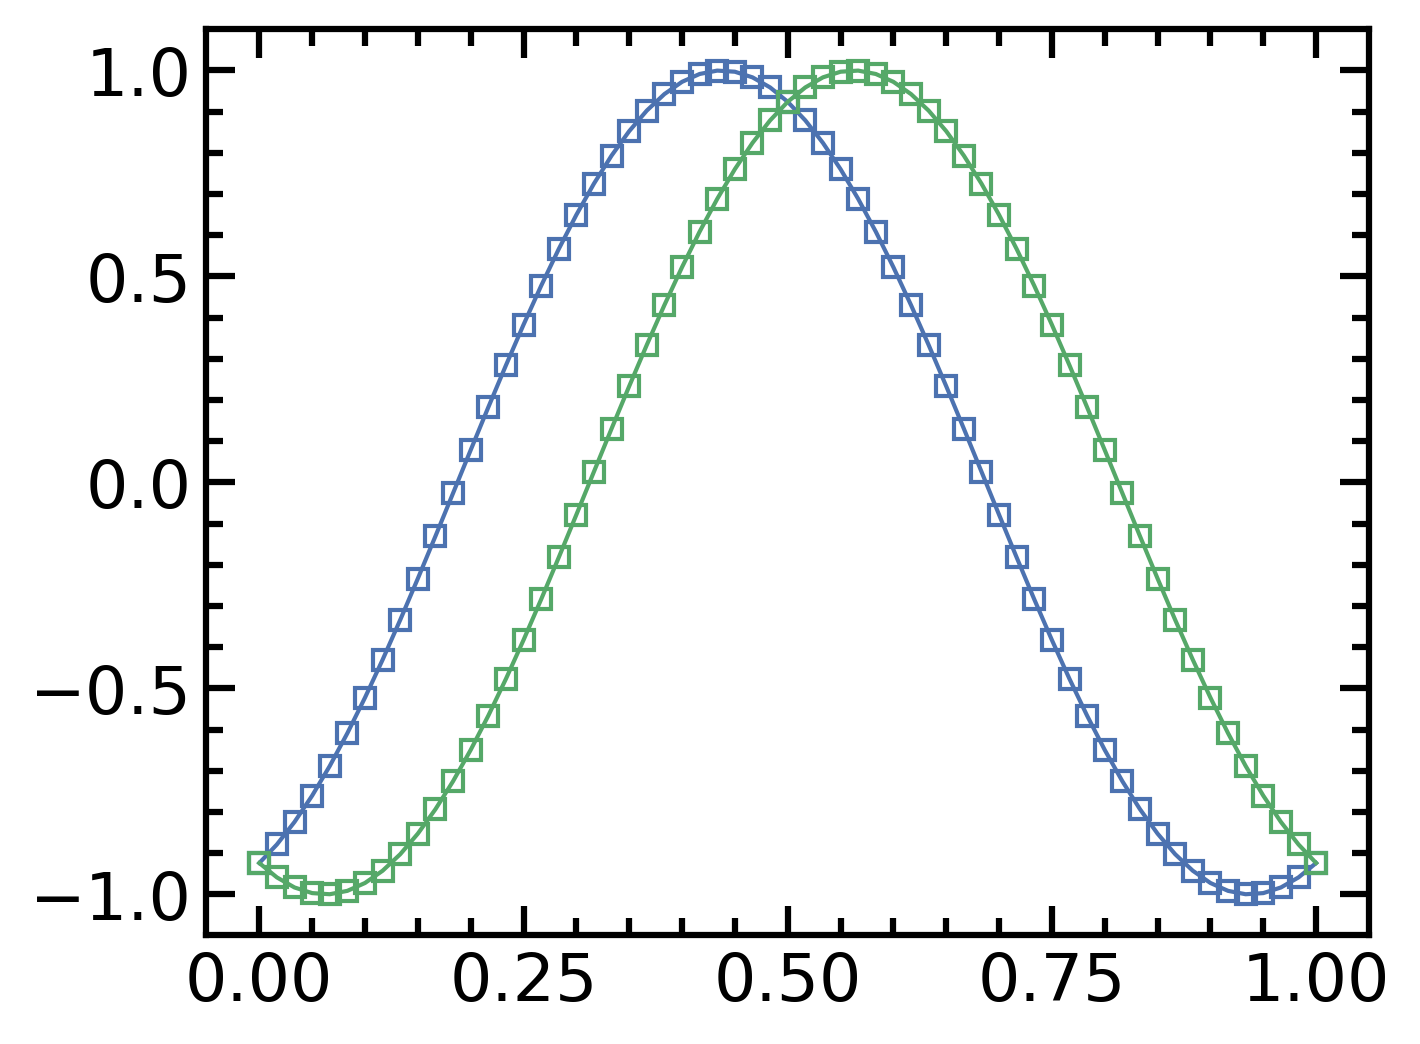

In [293]:
plt.figure(figsize=[5,4])
psi_ini0 = tensor(basis(2,0), basis(2,0))
psi_ini1 = tensor(basis(2,0), basis(2,1))

phi = np.pi/8
print (phi/np.pi)
ZZ_unitary = np.diag([np.exp(-1j*phi/2),np.exp(1j*phi/2),np.exp(1j*phi/2),np.exp(-1j*phi/2)])
ZZ_unitary = Qobj(ZZ_unitary)
ZZ_unitary.dims = [[2,2],[2,2]]
gate = ZZ_unitary
# gate = cphase(phi)*iswap()
X2I = tensor(ry(-np.pi/2),qeye(2))
XX = tensor(rx(np.pi),rx(np.pi))
varphi_array = np.linspace(0,2*np.pi,61)

proj0 = np.zeros_like(varphi_array)
proj1 = np.zeros_like(varphi_array)
for idx, varphi in enumerate(varphi_array):
    ZI = tensor(rz(varphi),qeye(2))
    circuit = X2I*ZI*gate*X2I*psi_ini0
    proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    circuit = X2I*ZI*gate*X2I*psi_ini1
    proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    
plt.errorbar(varphi_array/np.pi/2,proj0, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
plt.errorbar(varphi_array/np.pi/2,proj1, fmt='s', mfc='none', mew=1.0, mec='C1', ms = 5.0)

# np.save('/Users/longnguyen/Documents/Data/iSWAP/varphi_array.npy', varphi_array)
# np.save('/Users/longnguyen/Documents/Data/iSWAP/JAZZ_0.npy', proj0)
# np.save('/Users/longnguyen/Documents/Data/iSWAP/JAZZ_1.npy', proj1)

opt0,cov0 = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [1, 0.2, 0], xtol = 1e-10)
plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt0), linewidth = 1.0, color = 'C0',label=r'$|c=0\rangle$')
opt1,cov1 = curve_fit(cos_fit, ydata = proj1, xdata = varphi_array, p0 = [1, 0.2, 0], xtol = 1e-10)
plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt1), linewidth = 1.0, color = 'C1',label=r'$|c=1\rangle$')
print ((opt1[2]-opt0[2])%(2*np.pi))

varphi_nice = np.linspace(0, 2*np.pi,201)
angle = abs(varphi_nice[np.argmax(cos_fit(varphi_nice,*opt0))] - varphi_nice[np.argmax(cos_fit(varphi_nice,*opt1))])
print (angle%(2*np.pi)/(2*np.pi))
# plt.ylabel(r'$P_|0\rangle$')
# plt.xlabel(r'$\beta/2\pi$')
# plt.xlim([varphi_array[0]/np.pi/2,varphi_array[-1]/np.pi/2])
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/longnguyen/Google Drive/LBL Research/Illustration/Heisenberg paper/JAZZ_1.pdf')

### Sweeping angle

In [178]:
psi_ini0 = tensor(basis(2,0), basis(2,0))
psi_ini1 = tensor(basis(2,0), basis(2,1))
theta_array = np.linspace(-np.pi, np.pi,51)
phi_array = 0.7*np.cos(theta_array+0.2)
angle = np.zeros_like(phi_array)

X2I = tensor(rx(np.pi/2),qeye(2))
Y2I = tensor(ry(-np.pi/2),qeye(2))
XX = tensor(rx(np.pi),rx(np.pi))
varphi_array = np.linspace(-2*np.pi,2*np.pi,61)
varphi_nice = np.linspace(varphi_array[0], varphi_array[-1], 1001)
proj0 = np.zeros_like(varphi_array)
proj1 = np.zeros_like(varphi_array)
for phi_idx, phi in enumerate(phi_array):
    ZZ_unitary = np.diag([np.exp(-1j*phi/2),np.exp(1j*phi/2),np.exp(1j*phi/2),np.exp(-1j*phi/2)])
    ZZ_unitary = Qobj(ZZ_unitary)
    ZZ_unitary.dims = [[2,2],[2,2]]
    gate = ZZ_unitary
    for idx, varphi in enumerate(varphi_array):
        ZI = tensor(rz(varphi),qeye(2))
        circuit = Y2I*ZI*gate*XX*gate*Y2I*psi_ini0
        proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
        circuit = Y2I*ZI*gate*XX*gate*Y2I*psi_ini1
        proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    
    opt0,cov0 = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
    opt1,cov1 = curve_fit(cos_fit, ydata = proj1, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
    angle[phi_idx] = varphi_nice[np.argmax(cos_fit(varphi_nice,*opt0))] - varphi_nice[np.argmax(cos_fit(varphi_nice,*opt1))]
#     angle[phi_idx] = (opt1[2]-opt0[2])%(np.pi)/4.0/np.pi
#     plt.errorbar(varphi_array/np.pi/2,proj0, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
#     plt.errorbar(varphi_array/np.pi/2,proj1, fmt='s', mfc='none', mew=1.0, mec='C1', ms = 5.0)
#     plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt0), linewidth = 1.0, color = 'C0')
#     plt.plot(varphi_array/np.pi/2, cos_fit(varphi_array,*opt1), linewidth = 1.0, color = 'C1')

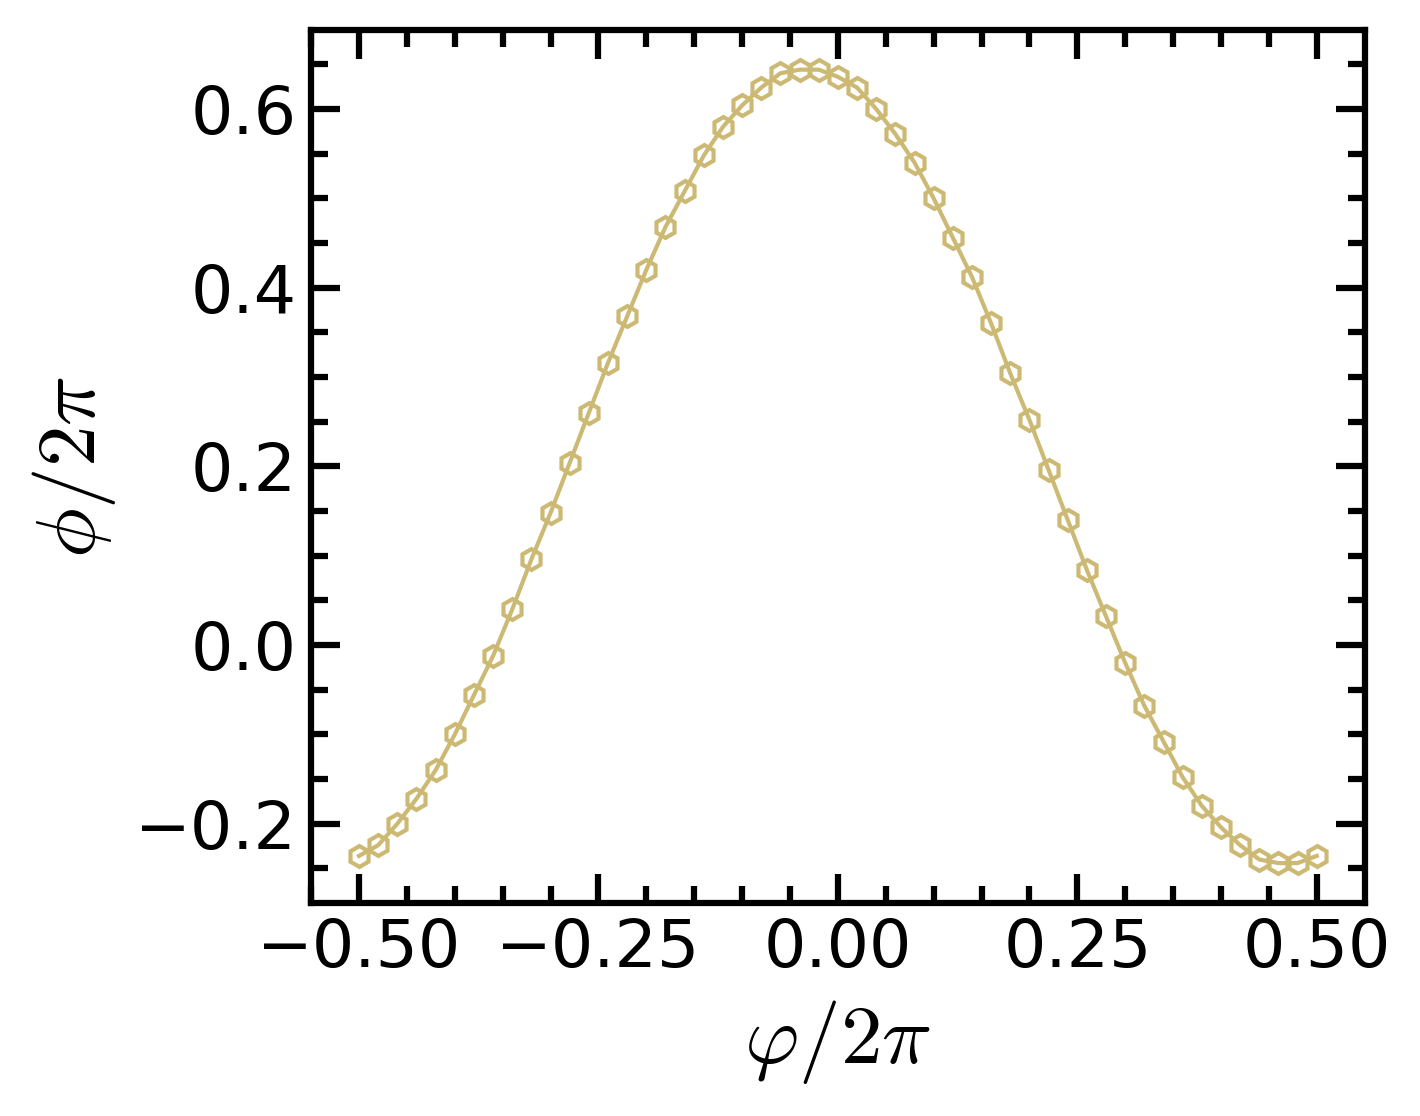

In [179]:
plt.figure(figsize=[5,4])
plt.errorbar(theta_array/np.pi/2,np.unwrap(angle)/2/np.pi+0.2, fmt='h', mfc='none', mew=1.0, mec='C4', ms = 5.0, linestyle = '-',linewidth = 1.0, color = 'C4')
opt,cov = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
plt.ylabel(r'$\phi/2\pi$')
plt.xlabel(r'$\varphi/2\pi$')
plt.tight_layout()
plt.savefig('/Users/longnguyen/Google Drive/LBL Research/Illustration/Heisenberg paper/JAZZ_2.pdf')

In [180]:
psi_ini0 = tensor(basis(2,0), basis(2,0))
psi_ini1 = tensor(basis(2,0), basis(2,1))
theta_array = np.linspace(-np.pi, np.pi,51)
phi_array = 0.7*np.cos(theta_array)-0.7
angle = np.zeros_like(phi_array)

X2I = tensor(rx(np.pi/2),qeye(2))
Y2I = tensor(ry(-np.pi/2),qeye(2))
XX = tensor(rx(np.pi),rx(np.pi))
varphi_array = np.linspace(-2*np.pi,2*np.pi,61)
varphi_nice = np.linspace(varphi_array[0], varphi_array[-1], 1001)
proj0 = np.zeros_like(varphi_array)
proj1 = np.zeros_like(varphi_array)
for phi_idx, phi in enumerate(phi_array):
    ZZ_unitary = np.diag([np.exp(-1j*phi/2),np.exp(1j*phi/2),np.exp(1j*phi/2),np.exp(-1j*phi/2)])
    ZZ_unitary = Qobj(ZZ_unitary)
    ZZ_unitary.dims = [[2,2],[2,2]]
#     gate = ZZ_unitary*iswap()
    gate = cphase(phi)*iswap()
    for idx, varphi in enumerate(varphi_array):
        ZI = tensor(rz(varphi),qeye(2))
        circuit = Y2I*ZI*gate*XX*gate*Y2I*psi_ini0
        proj0[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
        circuit = Y2I*ZI*gate*XX*gate*Y2I*psi_ini1
        proj1[idx] = expect(tensor(sigmaz(), qeye(2)), circuit)
    
    opt0,cov0 = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
    opt1,cov1 = curve_fit(cos_fit, ydata = proj1, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
    angle[phi_idx] = varphi_nice[np.argmax(cos_fit(varphi_nice,*opt0))] - varphi_nice[np.argmax(cos_fit(varphi_nice,*opt1))]   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


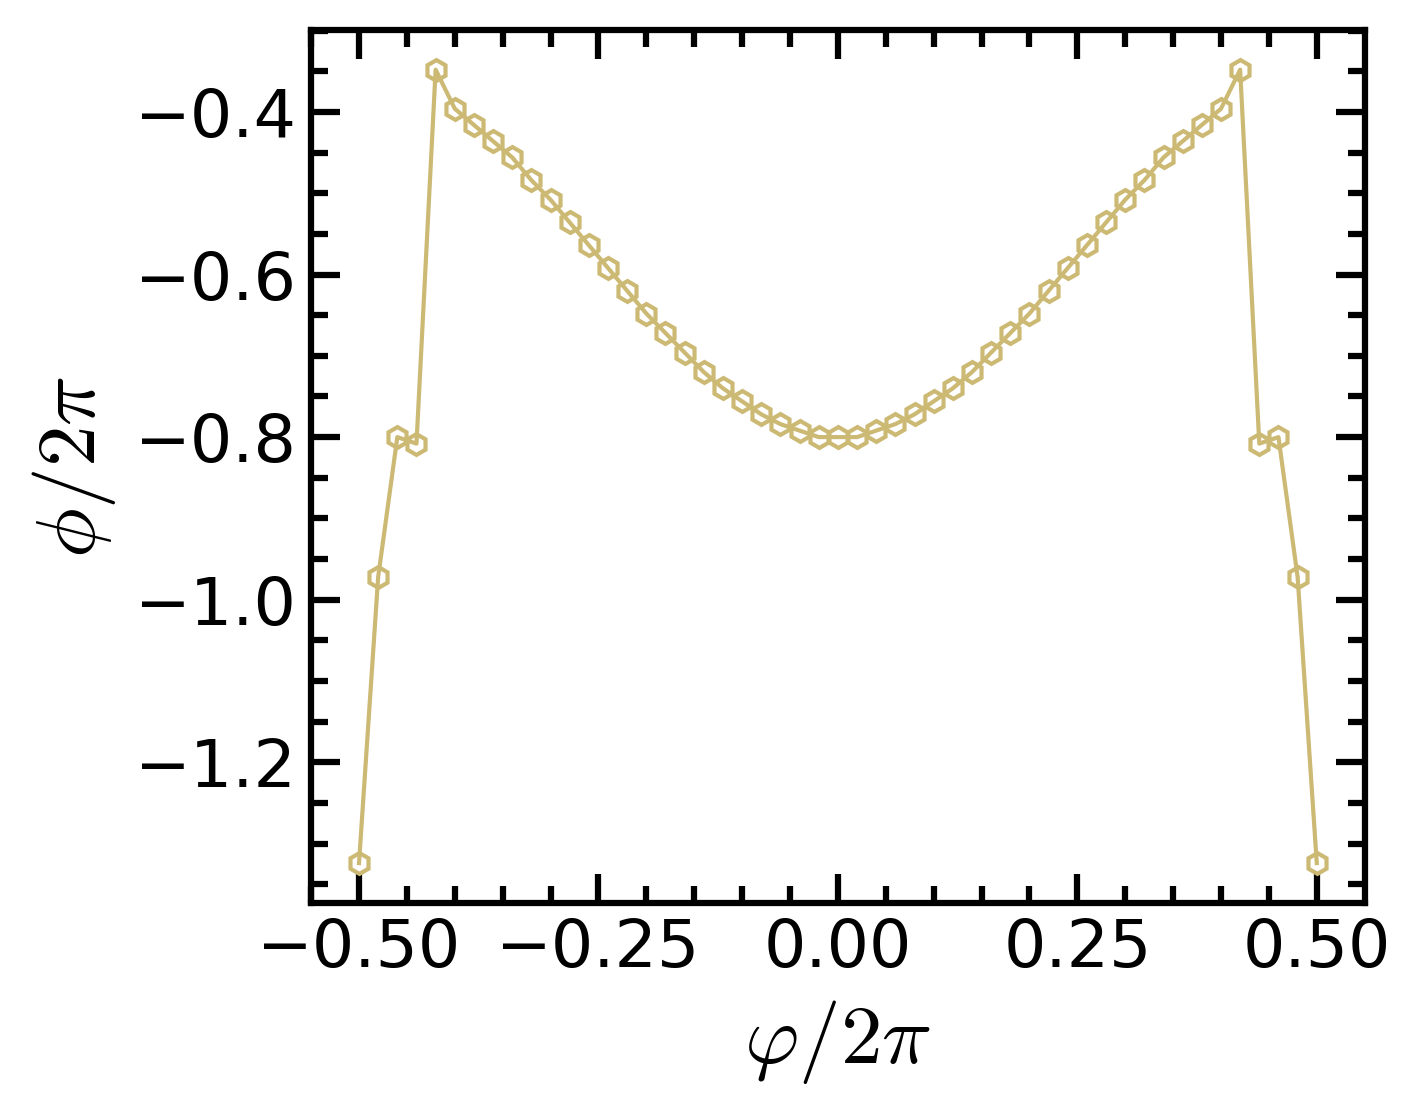

In [181]:
plt.figure(figsize=[5,4])
plt.errorbar(theta_array/np.pi/2,np.unwrap(angle)/2/np.pi+0.2, fmt='h', mfc='none', mew=1.0, mec='C4', ms = 5.0, linestyle = '-',linewidth = 1.0, color = 'C4')
opt,cov = curve_fit(cos_fit, ydata = proj0, xdata = varphi_array, p0 = [-1, 0.2, 0], xtol = 1e-10)
plt.ylabel(r'$\phi/2\pi$')
plt.xlabel(r'$\varphi/2\pi$')
plt.tight_layout()
plt.savefig('/Users/longnguyen/Google Drive/LBL Research/Illustration/Heisenberg paper/JAZZ_3.pdf')

## JAZZZ

In [11]:
h = three_coupled_qubits(freq1=5, freq2=5.1, freq3=5.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.01) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 5 #ns
t_list = np.linspace(0,T_gate/2,int(50*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_sweep)

# 000 <-> 0
# 100 <-> 1
# 010 <-> 2
# 001 <-> 3
# 110 <-> 4
# 101 <-> 5
# 011 <-> 6
# 111 <-> 7

### Measure first qubit

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ZZI rate =  0.020000024457757216  GHz
ZZI rate =  0.020000024458435146  GHz
ZIZ rate =  0.005000008851799427  GHz
ZIZ rate =  0.0050000088524773546  GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


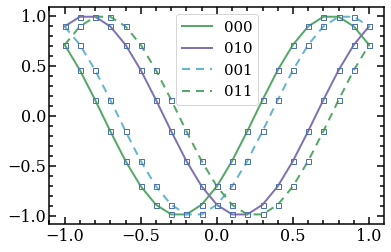

In [15]:
#Measure first qubit
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='010')
phase_010_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='001')
phase_001_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.5, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='011')
phase_011_q0 = opt[2]/(2*np.pi)
plt.legend()

zzi_rate = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
ziz_rate = abs(phase_000_q0 - phase_001_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')
ziz_rate = abs(phase_010_q0 - phase_011_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')

### Measure second qubit

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ZZI rate =  0.02000001798825693  GHz
ZZI rate =  0.02000001799005377  GHz
IZZ rate =  0.0150000139964481  GHz
IZZ rate =  0.015000013998244941  GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


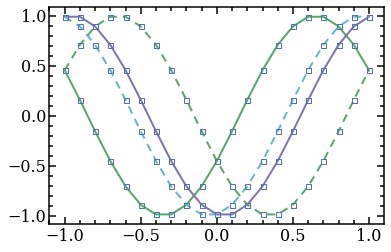

In [16]:
#Measure second qubit
ini_state = eig_vec[0] #000
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[1] #100
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_100_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='000')
phase_001_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[5] #101
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='000')
phase_101_q1 = opt[2]/(2*np.pi)

zzi_rate = abs(phase_000_q1 - phase_100_q1)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q1 - phase_101_q1)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
izz_rate = abs(phase_000_q1 - phase_001_q1)/T_gate/2
print ('IZZ rate = ',str(izz_rate),' GHz')
izz_rate = abs(phase_100_q1 - phase_101_q1)/T_gate/2
print ('IZZ rate = ',str(izz_rate),' GHz')

In [ ]:
#Measure both first and second qubits
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-')
phase_000_q0q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-')
phase_001_q0q1 = opt[2]/(2*np.pi)


## Modified JAZZZ

In [ ]:
h = three_coupled_qubits(freq1=5, freq2=5.1, freq3=5.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.002) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 5 #ns
t_list = np.linspace(0,T_gate/2,int(50*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_swe
                            ep)

# 000 <-> 0
# 100 <-> 1
# 010 <-> 2
# 001 <-> 3
# 110 <-> 4
# 101 <-> 5
# 011 <-> 6
# 111 <-> 7

In [ ]:
#Measure first qubit
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='010')
phase_010_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='001')
phase_001_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.5, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='011')
phase_011_q0 = opt[2]/(2*np.pi)
plt.legend()

zzi_rate = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
ziz_rate = abs(phase_000_q0 - phase_001_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')
ziz_rate = abs(phase_010_q0 - phase_011_q0)/T_gate/2


print ('ZIZ rate = ',str(ziz_rate),' GHz')

In [ ]:
zzi_rate_0 = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate_0),' GHz')
zzi_rate_1 = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate_1),' GHz')
zzz_rate = abs(zzi_rate_1 - zzi_rate_0)/2
print ('ZZZ rate = ',str(zzz_rate),' GHz')

# Using Qiskit

In [ ]:
from qiskit.quantum_info import Operator, Choi, Kraus, PTM, Chi
from qiskit import visualization
op = Operator(np.array(cnot()))
ptm_diss = 
ptm = PTM(ptm_ideal_2q)
# ptm = PTM(op)
# print (np.array(ptm)-ptm_ideal_2q)
# print (ptm)
# print (ptm_ideal_2q)
# visualization.plot_state_hinton (ptm)

iswap_uni = ptm.to_operator()
chk = np.array(iswap_uni)+np.array(iswap())
print (np.round(chk,1))
# ptm = PTM(ptm_ideal_2q)


In [ ]:

U_psi = iswap() * tensor(rz(0.1), rx(0.1)*ry(0.2))
N = len(U_psi.dims[0]) # number of qubits

# create a superoperator for the density matrix
# transformation rho = U_psi * rho_0 * U_psi.dag()
U_rho = spre(U_psi) * spost(U_psi.dag())

# operator basis for the process tomography
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(2)]

# labels for operator basis
op_label = [["i", "x", "y", "z"] for i in range(2)]

# calculate the chi matrix
chi = qpt(U_rho, op_basis)
qpt_plot_combined(chi, op_label)    

In [ ]:
prep_rotations = []
prep_ops = [qeye(2), sigmax(), sigmay(), sigmaz()]
for q1gate in prep_ops:
    for q2gate in prep_ops:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)
        
eig_val, eig_vec = Qobj(chi).eigenstates()

uni = np.zeros((4,4), dtype = complex)
for t in range(16):
    uni = uni + np.array(prep_rotations[t]*np.conjugate(eig_vec[-1][t][0,0]))

In [ ]:
np.round(uni,2)

In [ ]:
np.round(np.array(U_psi),2)

In [295]:
(1/np.sqrt(5.75e-12*7e-9))*1e-9

4.984447862792268